# Exploratory Data Analysis of Teams dataset

## Section: Data loading

This section focuses on loading the teams dataset for further analysis and processing. 
- import ``teams``
- see subset of dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

teams = pd.read_csv('basketballPlayoffs/teams.csv', delimiter=",")

teams.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum


## Section: Shift Target Variable Function Implementation

This section introduces a function, `shift_target_variable`, designed to shift the target variable 'playoff' in a dataset. 

(We are no longer using this function because the shift is all done inside the main file)

In [2]:
def shift_target_variable(dataset):
    dataset.sort_values(by=['tmID', 'year'], inplace=True)

    dataset['playoffs'] = dataset.groupby('tmID')['playoff'].shift(-1)

    dataset.drop(columns=['playoff'], inplace=True)

    dataset.dropna(subset=['playoffs'], inplace=True)

    dataset.rename(columns={'playoffs': 'playoff'}, inplace=True)

    dataset.reset_index(drop=True, inplace=True)

    return dataset

In [3]:
#teams = shift_target_variable(teams)

## Section: Exploratory Data Analysis for ``teams`` dataset
This section involves exploratory data analysis on the `teams` dataset, providing insights into its structure and relationships. The analysis is divided into several subsections.


### See number of unique values in each column to verify which columns can have repeated data and which not
- Iterate through each column in the 'teams' DataFrame.
- Print the number of different values in each column.
- Visualize the results using a horizontal bar chart.

In [4]:
for column in teams.columns:
    unique_values = teams[column].unique()
    print(f"Number of different values in the {column} column are:", len(unique_values))
    print("------------")

Number of different values in the year column are: 10
------------
Number of different values in the lgID column are: 1
------------
Number of different values in the tmID column are: 20
------------
Number of different values in the franchID column are: 18
------------
Number of different values in the confID column are: 2
------------
Number of different values in the divID column are: 1
------------
Number of different values in the rank column are: 8
------------
Number of different values in the playoff column are: 2
------------
Number of different values in the seeded column are: 1
------------
Number of different values in the firstRound column are: 3
------------
Number of different values in the semis column are: 3
------------
Number of different values in the finals column are: 3
------------
Number of different values in the name column are: 20
------------
Number of different values in the o_fgm column are: 116
------------
Number of different values in the o_fga column a

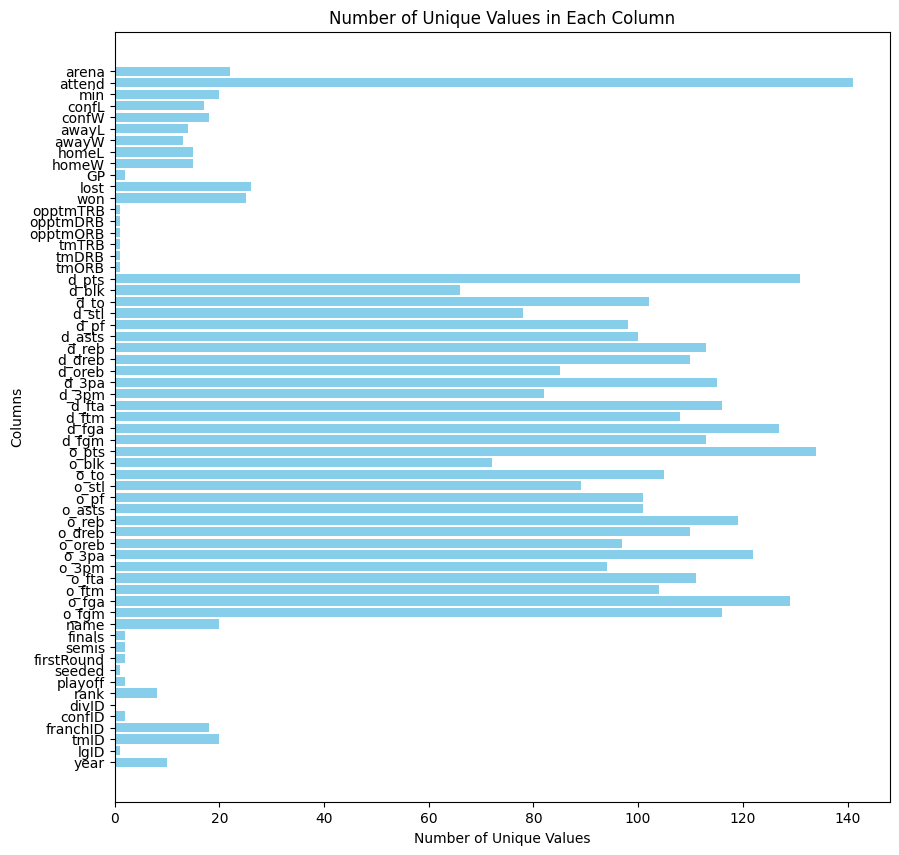

In [5]:
columns = []
value_counts = []

for column in teams.columns:
    unique_values = teams[column].nunique()
    columns.append(column)
    value_counts.append(unique_values)

plt.figure(figsize=(10, 10))
plt.barh(columns, value_counts, color='skyblue')
plt.xlabel('Number of Unique Values')
plt.ylabel('Columns')
plt.title('Number of Unique Values in Each Column')
plt.show()


### See if there are missing values
- Check for missing values in the dataset.

In [6]:
teams.isnull().sum()

year        0
lgID        0
tmID        0
franchID    0
confID      0
           ..
confW       0
confL       0
min         0
attend      0
arena       0
Length: 61, dtype: int64

### See what are the data types of each column
- Display data types of each column.

In [7]:
print(teams.dtypes)

year         int64
lgID        object
tmID        object
franchID    object
confID      object
             ...  
confW        int64
confL        int64
min          int64
attend       int64
arena       object
Length: 61, dtype: object


### Data Description 
- Create a copy of the original dataset for preservation.
- Convert categorical columns to numeric using category codes.
- Display descriptive statistics of the transformed dataset using the ``describe()`` function

In [8]:
teams_original = teams.copy()

for column in teams.columns:
    if teams[column].dtype == 'object':
        teams[column] = teams[column].astype('category').cat.codes

teams.describe()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
count,142.000000,142.0,142.000000,142.000000,142.000000,0.0,142.000000,142.000000,142.0,142.00000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,5.302817,0.0,10.070423,9.415493,0.507042,NaN,4.084507,0.563380,0.0,-0.15493,...,33.323944,10.169014,6.492958,6.492958,10.169014,10.563380,10.563380,6735.683099,141050.253521,10.838028
std,2.917274,0.0,5.426031,4.906564,0.501720,NaN,2.095226,0.497722,0.0,0.83620,...,0.949425,2.994017,2.967308,2.702104,2.731409,3.485461,3.485461,197.851093,34714.358519,6.565153
min,1.000000,0.0,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.0,-1.00000,...,32.000000,1.000000,0.000000,1.000000,3.000000,2.000000,2.000000,6400.000000,57635.000000,0.000000
25%,3.000000,0.0,6.000000,5.000000,0.000000,NaN,2.000000,0.000000,0.0,-1.00000,...,32.000000,8.000000,4.250000,5.000000,9.000000,8.000000,8.000000,6500.000000,120897.500000,6.000000
50%,5.000000,0.0,10.000000,10.000000,1.000000,NaN,4.000000,1.000000,0.0,0.00000,...,34.000000,11.000000,6.000000,6.000000,10.000000,11.000000,10.000000,6825.000000,135895.500000,10.000000
75%,8.000000,0.0,15.000000,14.000000,1.000000,NaN,6.000000,1.000000,0.0,1.00000,...,34.000000,12.000000,8.000000,8.000000,12.000000,13.000000,13.000000,6875.000000,150441.500000,16.000000
max,10.000000,0.0,19.000000,17.000000,1.000000,NaN,8.000000,1.000000,0.0,1.00000,...,34.000000,16.000000,16.000000,13.000000,16.000000,19.000000,19.000000,7025.000000,259237.000000,21.000000


### Correlation Matrix
- Generate a correlation matrix for continuous variables.
- Visualize the matrix using a heatmap.
- Print correlations between the target variable (``playoff``) and other features.

In [9]:
def correlation_matrix(dataframe):
    corr_matrix = dataframe.corr()

    target_correlation = corr_matrix['playoff']

    plt.figure(figsize=(30, 20))

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='coolwarm', linewidths=0.5, fmt=".2f")

    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

    dict = {}

    for feature, correlation in target_correlation.items():
        print(f"Correlation between target and {feature}: {correlation}")
        dict[feature] = correlation

    return dict

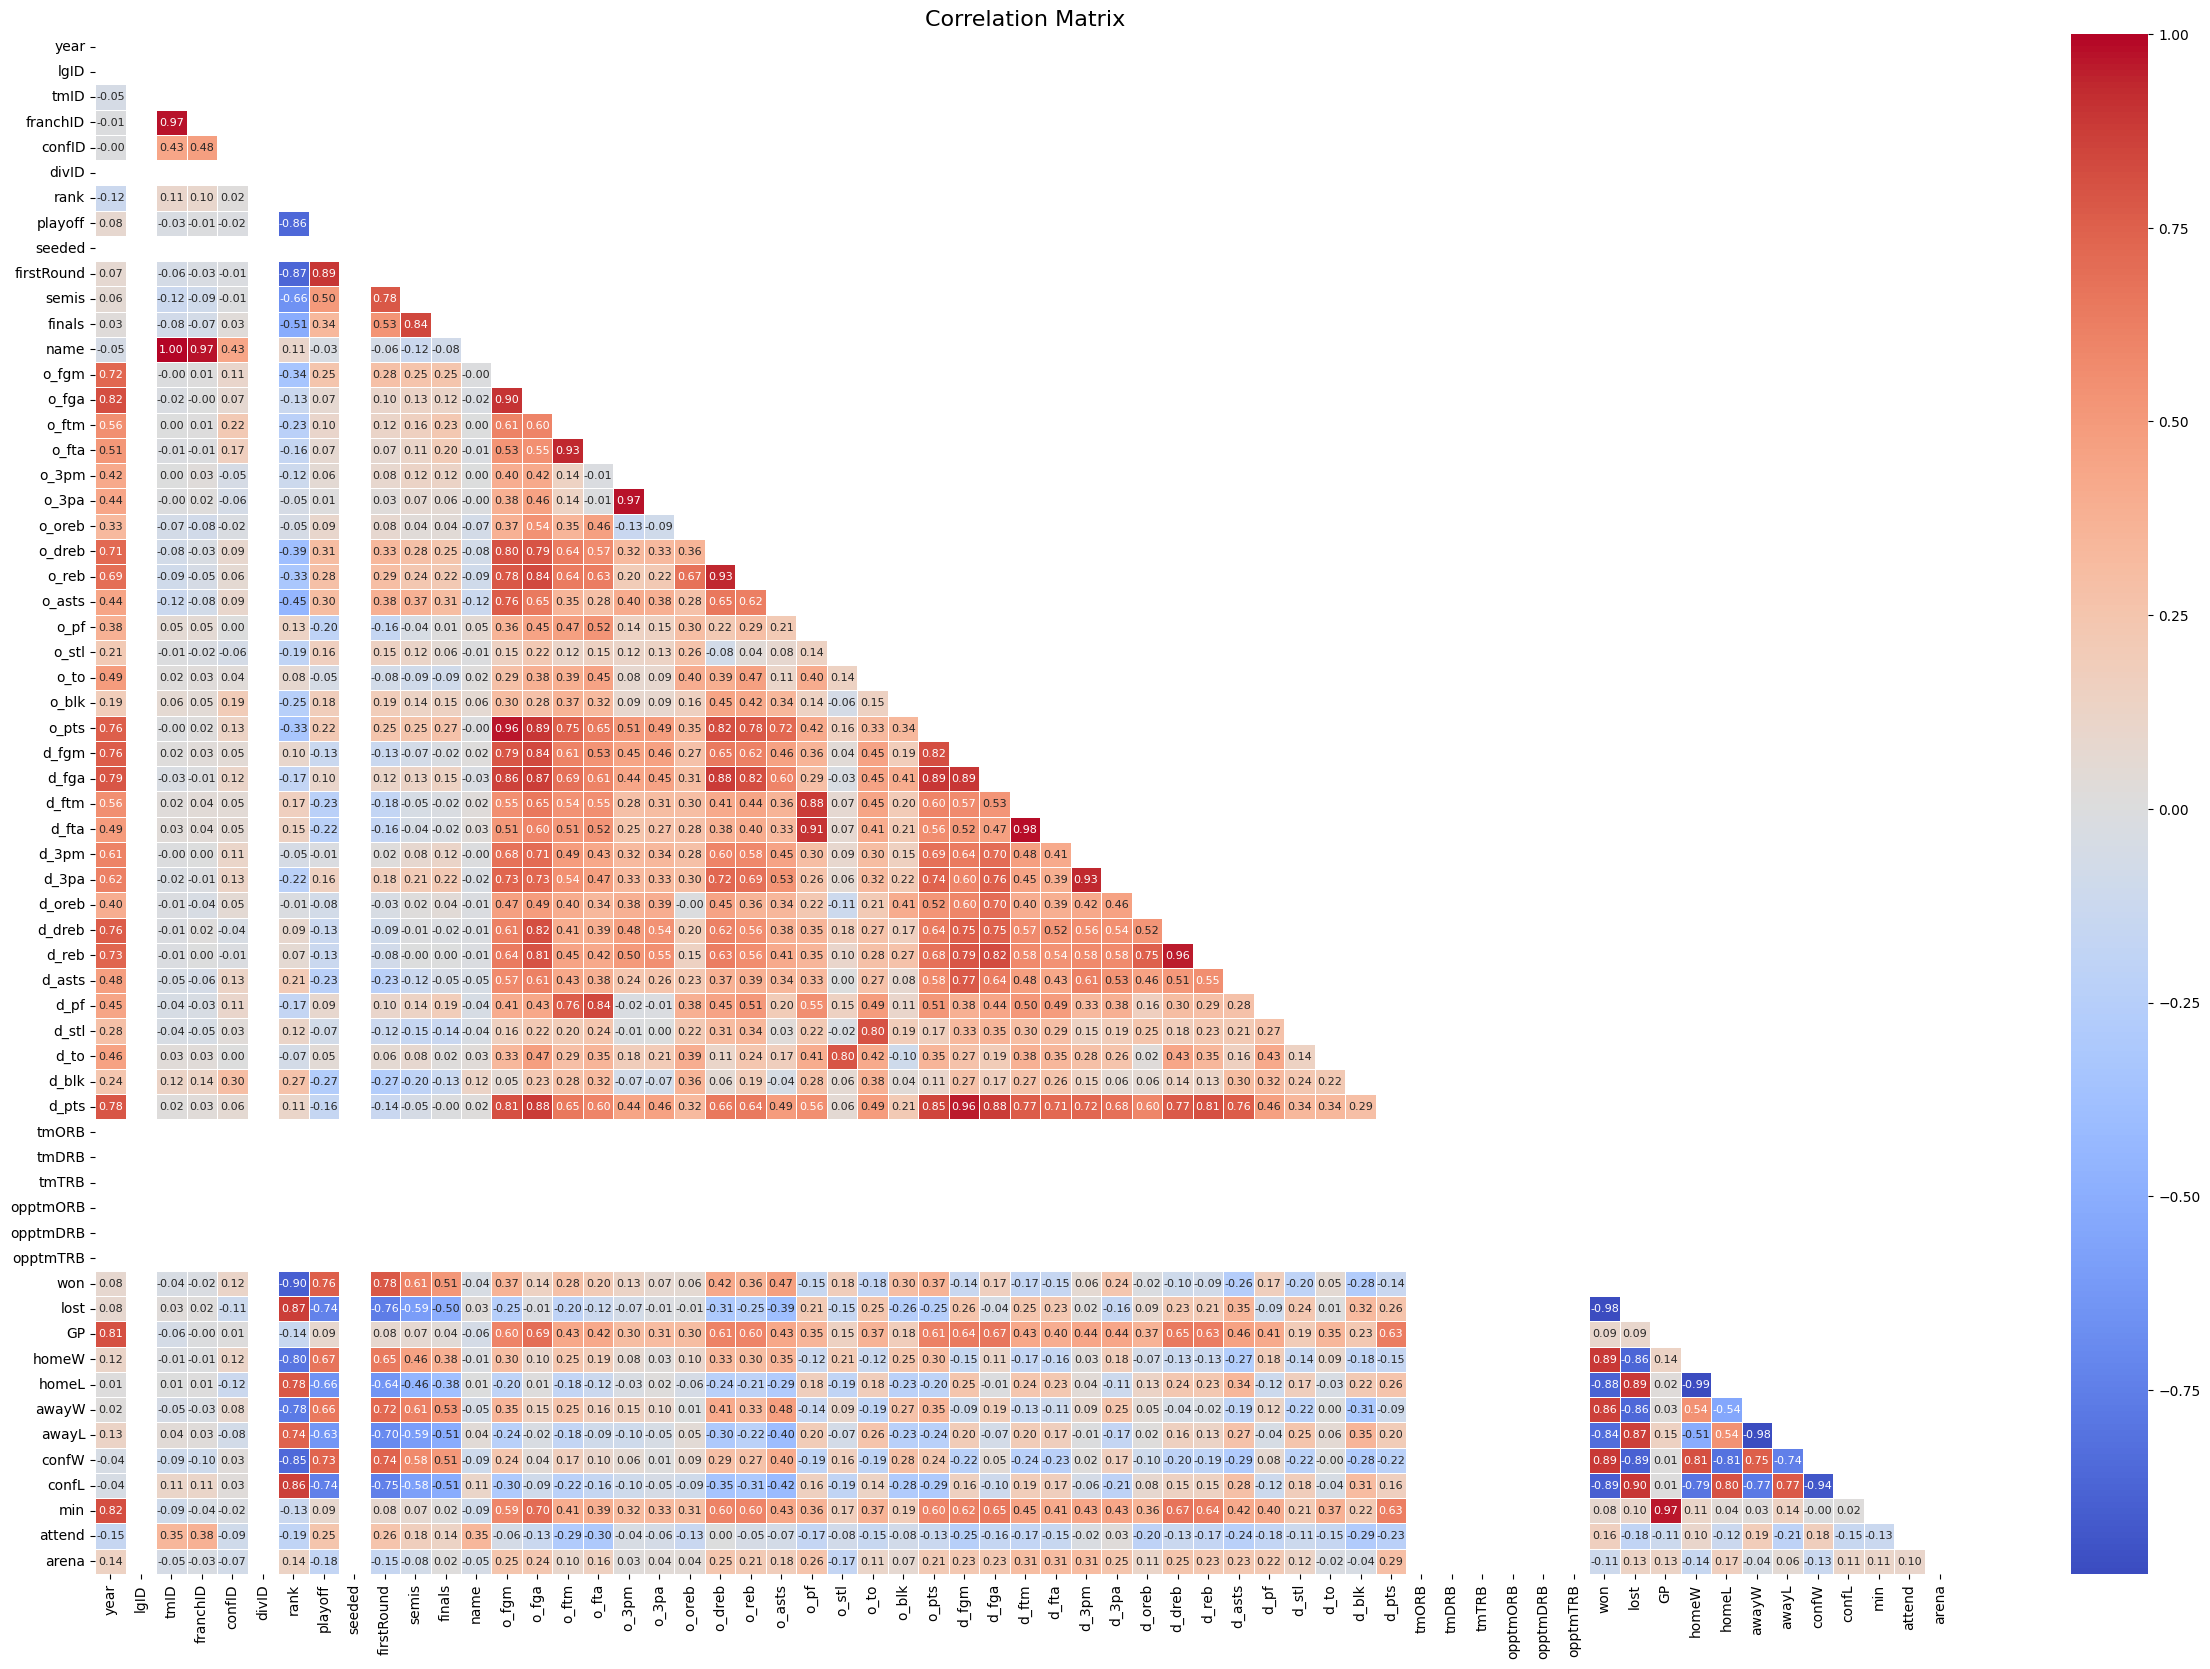

Correlation between target and year: 0.07705063246068848
Correlation between target and lgID: nan
Correlation between target and tmID: -0.02529934329892212
Correlation between target and franchID: -0.0065036191928241486
Correlation between target and confID: -0.016000512024577127
Correlation between target and divID: nan
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and seeded: nan
Correlation between target and firstRound: 0.892828570971414
Correlation between target and semis: 0.4970630193302927
Correlation between target and finals: 0.336817912482514
Correlation between target and name: -0.02529934329892215
Correlation between target and o_fgm: 0.2515792808650922
Correlation between target and o_fga: 0.07084000425330679
Correlation between target and o_ftm: 0.1047223173119909
Correlation between target and o_fta: 0.0724933405057681
Correlation between target and o_3pm: 0.060612269288855054
Correlation 

{'year': 0.07705063246068848,
 'lgID': nan,
 'tmID': -0.02529934329892212,
 'franchID': -0.0065036191928241486,
 'confID': -0.016000512024577127,
 'divID': nan,
 'rank': -0.8620790896686981,
 'playoff': 1.0,
 'seeded': nan,
 'firstRound': 0.892828570971414,
 'semis': 0.4970630193302927,
 'finals': 0.336817912482514,
 'name': -0.02529934329892215,
 'o_fgm': 0.2515792808650922,
 'o_fga': 0.07084000425330679,
 'o_ftm': 0.1047223173119909,
 'o_fta': 0.0724933405057681,
 'o_3pm': 0.060612269288855054,
 'o_3pa': 0.007957559282677005,
 'o_oreb': 0.0923630258772151,
 'o_dreb': 0.30755716728105326,
 'o_reb': 0.2794116621840806,
 'o_asts': 0.3032475605334074,
 'o_pf': -0.2029192427184587,
 'o_stl': 0.1648824091126278,
 'o_to': -0.051552794336507696,
 'o_blk': 0.17871539023127894,
 'o_pts': 0.2213991839184398,
 'd_fgm': -0.1300557721536696,
 'd_fga': 0.10293846565632093,
 'd_ftm': -0.23395831262583386,
 'd_fta': -0.2196777440462202,
 'd_3pm': -0.00932954576569799,
 'd_3pa': 0.15591906469556485,
 

In [10]:
correlation_matrix(teams)

### Chi-square Test
- Perform the chi-square test for categorical variables against the target variable (``playoff``).
- Print chi-square values, p-values, and test results.

In [11]:
def chi_square(dataset, target): 
    alpha = 0.05
    
    for feature in dataset.columns:
        if feature != target:
            contingency_table = pd.crosstab(dataset[feature], dataset[target])

            # check if any category has no data
            if contingency_table.shape[0] == 0 or contingency_table.shape[1] == 0:
                print(f"No data for {feature} and {target}")
                continue
            
            chi2, p, observed, expected = chi2_contingency(contingency_table)
            
            # Step 4: Print or store the results
            print(f"Chi-square test for {feature} and {target}:")
            print(f"Chi-square value: {chi2}")
            print(f"P-value: {p}")
            if p < alpha:
                print("Reject the null hypothesis. There is a significant association.")
            else:
                print("Fail to reject the null hypothesis. There is not enough evidence for a significant association.")
            print("")

In [12]:
chi_square(teams, 'playoff')

Chi-square test for year and playoff:
Chi-square value: 1.3666430343849703
P-value: 0.9980204687073957
Fail to reject the null hypothesis. There is not enough evidence for a significant association.

Chi-square test for lgID and playoff:
Chi-square value: 0.0
P-value: 1.0
Fail to reject the null hypothesis. There is not enough evidence for a significant association.

Chi-square test for tmID and playoff:
Chi-square value: 32.49763248847927
P-value: 0.027449727442441722
Reject the null hypothesis. There is a significant association.

Chi-square test for franchID and playoff:
Chi-square value: 29.671265360983107
P-value: 0.028815606896854487
Reject the null hypothesis. There is a significant association.

Chi-square test for confID and playoff:
Chi-square value: 0.00046010944700461995
P-value: 0.9828865593186417
Fail to reject the null hypothesis. There is not enough evidence for a significant association.

No data for divID and playoff
Chi-square test for rank and playoff:
Chi-square va

### Point-Biserial Correlation
- Calculate point-biserial correlation for continuous and categorical variables against the target variable (``playoff``).
- Display correlation coefficients and p-values in a DataFrame.

In [13]:
# continuous variables
def point_biserial(dataset, features, target):
    binary_target = dataset[target]

    # Create an empty dictionary to store correlation coefficients and p-values
    correlation_results = {}

    # Iterate through each column in the DataFrame
    for column in features:
            # Calculate point-biserial correlation
            correlation, p_value = pointbiserialr(dataset[column], binary_target)
            
            # Store the results in the dictionary
            correlation_results[column] = {'correlation': correlation, 'p_value': p_value}

    # Convert the dictionary to a DataFrame for easier analysis
    results_df = pd.DataFrame.from_dict(correlation_results, orient='index')

    # Display the results
    print(results_df)

In [14]:
continuous_features = ["year", "rank", "o_fgm","o_fga","o_ftm","o_fta","o_3pm","o_3pa","o_oreb","o_dreb","o_reb","o_asts","o_pf","o_stl","o_to","o_blk","o_pts","d_fgm","d_fga","d_ftm","d_fta","d_3pm","d_3pa","d_oreb","d_dreb","d_reb","d_asts","d_pf","d_stl","d_to","d_blk","d_pts","tmORB","tmDRB","tmTRB","opptmORB","opptmDRB","opptmTRB","won","lost","GP","homeW","homeL","awayW","awayL","confW","confL","min","attend"]
categorical_features = ["tmID", "confID", "firstRound","semis","finals","arena"]
target = "playoff"

point_biserial(teams, continuous_features, 'playoff')

          correlation       p_value
year         0.077051  3.620822e-01
rank        -0.862079  3.676880e-43
o_fgm        0.251579  2.526531e-03
o_fga        0.070840  4.021722e-01
o_ftm        0.104722  2.148667e-01
o_fta        0.072493  3.912508e-01
o_3pm        0.060612  4.736495e-01
o_3pa        0.007958  9.251182e-01
o_oreb       0.092363  2.742871e-01
o_dreb       0.307557  1.966872e-04
o_reb        0.279412  7.586043e-04
o_asts       0.303248  2.440341e-04
o_pf        -0.202919  1.543781e-02
o_stl        0.164882  4.989340e-02
o_to        -0.051553  5.423269e-01
o_blk        0.178715  3.333881e-02
o_pts        0.221399  8.099316e-03
d_fgm       -0.130056  1.229145e-01
d_fga        0.102938  2.228242e-01
d_ftm       -0.233958  5.074057e-03
d_fta       -0.219678  8.619374e-03
d_3pm       -0.009330  9.122554e-01
d_3pa        0.155919  6.389426e-02
d_oreb      -0.075642  3.709516e-01
d_dreb      -0.128503  1.274875e-01
d_reb       -0.125970  1.352279e-01
d_asts      -0.226576  6.698

c:\Users\migue\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:5657: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


In [15]:
point_biserial(teams, categorical_features, 'playoff')

            correlation       p_value
tmID          -0.025299  7.650471e-01
confID        -0.016001  8.500968e-01
firstRound     0.892829  2.398164e-50
semis          0.497063  3.130200e-10
finals         0.336818  4.156818e-05
arena         -0.178068  3.399359e-02


- 0.00 to 0.19: Very weak correlation
- 0.20 to 0.39: Weak correlation
- 0.40 to 0.59: Moderate correlation
- 0.60 to 0.79: Strong correlation
- 0.80 to 1.00: Very strong correlation

Sometimes when comparing features with binary values we should not use Correlation Matrix. When the Correlation Matrix is applied to binary variables, it might not capture the full extent of the association, so in order to be sure we are taking the right conclusions we applied other tools in order to understand feature correlation. 

As we can see, features related to the playoffs are heavily related to whether the team made it to playoffs or not (as expected).  
Some features have no correlation, so they can be eliminated ('lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB')  
Some others like 'name', ' tmID' and 'franchID' are highly related to each other, which means we can delete and leave just one of them. 

In [16]:
teams = teams.drop(columns=['name', 'franchID'])
teams_original = teams_original.drop(columns=['name', 'franchID'])

## Section: Calculate team power ranking

We can start by reducing the number of feature a team has and make them better features for evaluation, like Points-per-Game for example.

- Offensive Field Goal Percentage: Percentage of successful field goals.
- Offensive Free Throw Percentage: Percentage of successful free throws.
- Offensive Three-Point Percentage: Percentage of successful three-pointers.
- Offensive Rebounds Per Game: Average number of offensive rebounds per game.
- Offensive Assists Per Game: Average number of offensive assists per game.
- Offensive Personal Fouls Per Game: Average number of offensive personal fouls per game.
- Offensive Steals Per Game: Average number of offensive steals per game.
- Offensive Turnovers Per Game: Average number of offensive turnovers per game.
- Offensive Blocks Per Game: Average number of offensive blocks per game.
- Offensive Points Per Game: Average number of offensive points per game.

In [17]:
# offensive stats
offensiveFieldGoalPercentageMax = 0
offensiveFieldGoalPercentageMin = 100

offensiveFreeThrowPercentageMax = 0
offensiveFreeThrowPercentageMin = 100

offensiveThreePointPercentageMax = 0
offensiveThreePointPercentageMin = 100

offensiveReboundsPerGameMax = 0
offensiveReboundsPerGameMin = 999

offensiveAssistsPerGameMax = 0
offensiveAssistsPerGameMin = 999

offensivePersonalFoulsPerGameMax = 0
offensivePersonalFoulsPerGameMin = 999

offensiveStealsPerGameMax = 0
offensiveStealsPerGameMin = 999

offensiveTurnoversPerGameMax = 0
offensiveTurnoversPerGameMin = 999

offensiveBlocksPerGameMax = 0
offensiveBlocksPerGameMin = 999

offensivePointsPerGameMax = 0
offensivePointsPerGameMin = 999

- Defensive Field Goal Percentage: Percentage of successful field goals allowed.
- Defensive Free Throw Percentage: Percentage of successful free throws allowed.
- Defensive Three-Point Percentage: Percentage of successful three-pointers allowed.
- Defensive Rebounds Per Game: Average number of defensive rebounds allowed per game.
- Defensive Assists Per Game: Average number of defensive assists allowed per game.
- Defensive Personal Fouls Per Game: Average number of defensive personal fouls allowed per game.
- Defensive Steals Per Game: Average number of defensive steals allowed per game.
- Defensive Turnovers Per Game: Average number of defensive turnovers allowed per game.
- Defensive Blocks Per Game: Average number of defensive blocks allowed per game.
- Defensive Points Per Game: Average number of defensive points allowed per game.

In [18]:
# defensive stats
defensiveFieldGoalPercentageMax = 0
defensiveFieldGoalPercentageMin = 100

defensiveFreeThrowPercentageMax = 0
defensiveFreeThrowPercentageMin = 100

defensiveThreePointPercentageMax = 0
defensiveThreePointPercentageMin = 100

defensiveReboundsPerGameMax = 0
defensiveReboundsPerGameMin = 999

defensiveAssistsPerGameMax = 0
defensiveAssistsPerGameMin = 999

defensivePersonalFoulsPerGameMax = 0
defensivePersonalFoulsPerGameMin = 999

defensiveStealsPerGameMax = 0
defensiveStealsPerGameMin = 999

defensiveTurnoversPerGameMax = 0
defensiveTurnoversPerGameMin = 999

defensiveBlocksPerGameMax = 0
defensiveBlocksPerGameMin = 999

defensivePointsPerGameMax = 0
defensivePointsPerGameMin = 999

- Win Percentage: Percentage of games won.
- Home Win Percentage: Percentage of home games won.
- Away Win Percentage: Percentage of away games won.
- Conference Win Percentage: Percentage of conference games won.
- Attendance: Normalized attendance.

In [19]:
# global stats
winPercentageMax = 0
winPercentageMin = 100

homeWinPercentageMax = 0
homeWinPercentageMin = 100

awayWinPercentageMax = 0
awayWinPercentageMin = 100

conferenceWinPercentageMax = 0
conferenceWinPercentageMin = 100

attendanceMax = 0
attendanceMin = 9999999

rankMax = 0
rankMin = 1

o_orebMax = 0
o_orebMin = 999

o_drebMax = 0
o_drebMin = 999

d_orebMax = 0
d_orebMin = 999

d_drebMax = 0
d_drebMin = 999

In this subsection, we iterate through each team in the dataset for a given year, calculating maximum and minimum values for various offensive, defensive, and global performance metrics. This preprocessing step is crucial for normalizing data before computing power rankings.

Key Metrics:
- Offensive and defensive percentages (e.g., field goals, free throws).
- Rebounds, assists, steals, turnovers, blocks, and points per game.
- Win percentages (total, home, away, conference).
- Attendance and team rank.

This process ensures a standardized scale for subsequent power ranking computations.

In [20]:
yearly_stats = {}

In [21]:
for year, year_data in teams.groupby('year'):
  
    year_dict = {}

    for index, row in year_data.iterrows():
        # offensive stats
        offensiveFieldGoalPercentage = (row['o_fgm'] / row['o_fga']) * 100

        # Update max and min for each stat per year
        year_dict.setdefault('offensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFieldGoalPercentage']['max'] = max(year_dict['offensiveFieldGoalPercentage']['max'], offensiveFieldGoalPercentage)
        year_dict['offensiveFieldGoalPercentage']['min'] = min(year_dict['offensiveFieldGoalPercentage']['min'], offensiveFieldGoalPercentage)

        offensiveFreeThrowPercentage = (row['o_ftm'] / row['o_fta']) * 100

        year_dict.setdefault('offensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveFreeThrowPercentage']['max'] = max(year_dict['offensiveFreeThrowPercentage']['max'], offensiveFreeThrowPercentage)
        year_dict['offensiveFreeThrowPercentage']['min'] = min(year_dict['offensiveFreeThrowPercentage']['min'], offensiveFreeThrowPercentage)


        offensiveThreePointPercentage = (row['o_3pm'] / row['o_3pa']) * 100

        year_dict.setdefault('offensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveThreePointPercentage']['max'] = max(year_dict['offensiveThreePointPercentage']['max'], offensiveThreePointPercentage)
        year_dict['offensiveThreePointPercentage']['min'] = min(year_dict['offensiveThreePointPercentage']['min'], offensiveThreePointPercentage)


        offensiveReboundsPerGame = row['o_reb'] / row['GP']

        year_dict.setdefault('offensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveReboundsPerGame']['max'] = max(year_dict['offensiveReboundsPerGame']['max'], offensiveReboundsPerGame)
        year_dict['offensiveReboundsPerGame']['min'] = min(year_dict['offensiveReboundsPerGame']['min'], offensiveReboundsPerGame)


        offensiveAssistsPerGame = row['o_asts'] / row['GP']

        year_dict.setdefault('offensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveAssistsPerGame']['max'] = max(year_dict['offensiveAssistsPerGame']['max'], offensiveAssistsPerGame)
        year_dict['offensiveAssistsPerGame']['min'] = min(year_dict['offensiveAssistsPerGame']['min'], offensiveAssistsPerGame)

        offensivePersonalFoulsPerGame = row['o_pf'] / row['GP']

        year_dict.setdefault('offensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePersonalFoulsPerGame']['max'] = max(year_dict['offensivePersonalFoulsPerGame']['max'], offensivePersonalFoulsPerGame)
        year_dict['offensivePersonalFoulsPerGame']['min'] = min(year_dict['offensivePersonalFoulsPerGame']['min'], offensivePersonalFoulsPerGame)

        offensiveStealsPerGame = row['o_stl'] / row['GP']

        year_dict.setdefault('offensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveStealsPerGame']['max'] = max(year_dict['offensiveStealsPerGame']['max'], offensiveStealsPerGame)
        year_dict['offensiveStealsPerGame']['min'] = min(year_dict['offensiveStealsPerGame']['min'], offensiveStealsPerGame)

        offensiveTurnoversPerGame = row['o_to'] / row['GP']

        year_dict.setdefault('offensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveTurnoversPerGame']['max'] = max(year_dict['offensiveTurnoversPerGame']['max'], offensiveTurnoversPerGame)
        year_dict['offensiveTurnoversPerGame']['min'] = min(year_dict['offensiveTurnoversPerGame']['min'], offensiveTurnoversPerGame)

        offensiveBlocksPerGame = row['o_blk'] / row['GP']

        year_dict.setdefault('offensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensiveBlocksPerGame']['max'] = max(year_dict['offensiveBlocksPerGame']['max'], offensiveBlocksPerGame)
        year_dict['offensiveBlocksPerGame']['min'] = min(year_dict['offensiveBlocksPerGame']['min'], offensiveBlocksPerGame)

        offensivePointsPerGame = row['o_pts'] / row['GP']

        year_dict.setdefault('offensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['offensivePointsPerGame']['max'] = max(year_dict['offensivePointsPerGame']['max'], offensivePointsPerGame)
        year_dict['offensivePointsPerGame']['min'] = min(year_dict['offensivePointsPerGame']['min'], offensivePointsPerGame)

        # defensive stats
        defensiveFieldGoalPercentage = (row['d_fgm'] / row['d_fga']) * 100

        year_dict.setdefault('defensiveFieldGoalPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFieldGoalPercentage']['max'] = max(year_dict['defensiveFieldGoalPercentage']['max'], defensiveFieldGoalPercentage)
        year_dict['defensiveFieldGoalPercentage']['min'] = min(year_dict['defensiveFieldGoalPercentage']['min'], defensiveFieldGoalPercentage)

        defensiveFreeThrowPercentage = (row['d_ftm'] / row['d_fta']) * 100

        year_dict.setdefault('defensiveFreeThrowPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveFreeThrowPercentage']['max'] = max(year_dict['defensiveFreeThrowPercentage']['max'], defensiveFreeThrowPercentage)
        year_dict['defensiveFreeThrowPercentage']['min'] = min(year_dict['defensiveFreeThrowPercentage']['min'], defensiveFreeThrowPercentage)

        defensiveThreePointPercentage = (row['d_3pm'] / row['d_3pa']) * 100

        year_dict.setdefault('defensiveThreePointPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveThreePointPercentage']['max'] = max(year_dict['defensiveThreePointPercentage']['max'], defensiveThreePointPercentage)
        year_dict['defensiveThreePointPercentage']['min'] = min(year_dict['defensiveThreePointPercentage']['min'], defensiveThreePointPercentage)

        defensiveReboundsPerGame = row['d_reb'] / row['GP']

        year_dict.setdefault('defensiveReboundsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveReboundsPerGame']['max'] = max(year_dict['defensiveReboundsPerGame']['max'], defensiveReboundsPerGame)
        year_dict['defensiveReboundsPerGame']['min'] = min(year_dict['defensiveReboundsPerGame']['min'], defensiveReboundsPerGame)

        defensiveAssistsPerGame = row['d_asts'] / row['GP']

        year_dict.setdefault('defensiveAssistsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveAssistsPerGame']['max'] = max(year_dict['defensiveAssistsPerGame']['max'], defensiveAssistsPerGame)
        year_dict['defensiveAssistsPerGame']['min'] = min(year_dict['defensiveAssistsPerGame']['min'], defensiveAssistsPerGame)

        defensivePersonalFoulsPerGame = row['d_pf'] / row['GP']

        year_dict.setdefault('defensivePersonalFoulsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePersonalFoulsPerGame']['max'] = max(year_dict['defensivePersonalFoulsPerGame']['max'], defensivePersonalFoulsPerGame)
        year_dict['defensivePersonalFoulsPerGame']['min'] = min(year_dict['defensivePersonalFoulsPerGame']['min'], defensivePersonalFoulsPerGame)

        defensiveStealsPerGame = row['d_stl'] / row['GP']

        year_dict.setdefault('defensiveStealsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveStealsPerGame']['max'] = max(year_dict['defensiveStealsPerGame']['max'], defensiveStealsPerGame)
        year_dict['defensiveStealsPerGame']['min'] = min(year_dict['defensiveStealsPerGame']['min'], defensiveStealsPerGame)

        defensiveTurnoversPerGame = row['d_to'] / row['GP']

        year_dict.setdefault('defensiveTurnoversPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveTurnoversPerGame']['max'] = max(year_dict['defensiveTurnoversPerGame']['max'], defensiveTurnoversPerGame)
        year_dict['defensiveTurnoversPerGame']['min'] = min(year_dict['defensiveTurnoversPerGame']['min'], defensiveTurnoversPerGame)

        defensiveBlocksPerGame = row['d_blk'] / row['GP']

        year_dict.setdefault('defensiveBlocksPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensiveBlocksPerGame']['max'] = max(year_dict['defensiveBlocksPerGame']['max'], defensiveBlocksPerGame)
        year_dict['defensiveBlocksPerGame']['min'] = min(year_dict['defensiveBlocksPerGame']['min'], defensiveBlocksPerGame)

        defensivePointsPerGame = row['d_pts'] / row['GP']

        year_dict.setdefault('defensivePointsPerGame', {'max': -float('inf'), 'min': float('inf')})
        year_dict['defensivePointsPerGame']['max'] = max(year_dict['defensivePointsPerGame']['max'], defensivePointsPerGame)
        year_dict['defensivePointsPerGame']['min'] = min(year_dict['defensivePointsPerGame']['min'], defensivePointsPerGame)

        winPercentage = row['won'] / row['GP'] * 100

        year_dict.setdefault('winPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['winPercentage']['max'] = max(year_dict['winPercentage']['max'], winPercentage)
        year_dict['winPercentage']['min'] = min(year_dict['winPercentage']['min'], winPercentage)

        homeWinPercentage = row['homeW'] / (row['homeW'] + row['homeL']) * 100

        year_dict.setdefault('homeWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['homeWinPercentage']['max'] = max(year_dict['homeWinPercentage']['max'], homeWinPercentage)
        year_dict['homeWinPercentage']['min'] = min(year_dict['homeWinPercentage']['min'], homeWinPercentage)

        awayWinPercentage = row['awayW'] / (row['awayW'] + row['awayL']) * 100

        year_dict.setdefault('awayWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['awayWinPercentage']['max'] = max(year_dict['awayWinPercentage']['max'], awayWinPercentage)
        year_dict['awayWinPercentage']['min'] = min(year_dict['awayWinPercentage']['min'], awayWinPercentage)

        conferenceWinPercentage = row['confW'] / (row['confW'] + row['confL']) * 100

        year_dict.setdefault('conferenceWinPercentage', {'max': -float('inf'), 'min': float('inf')})
        year_dict['conferenceWinPercentage']['max'] = max(year_dict['conferenceWinPercentage']['max'], conferenceWinPercentage)
        year_dict['conferenceWinPercentage']['min'] = min(year_dict['conferenceWinPercentage']['min'], conferenceWinPercentage)

        attendance = row['attend']

        year_dict.setdefault('attendance', {'max': -float('inf'), 'min': float('inf')})
        year_dict['attendance']['max'] = max(year_dict['attendance']['max'], attendance)
        year_dict['attendance']['min'] = min(year_dict['attendance']['min'], attendance)

        rank = row['rank']

        year_dict.setdefault('rank', {'max': -float('inf'), 'min': float('inf')})
        year_dict['rank']['max'] = max(year_dict['rank']['max'], rank)
        year_dict['rank']['min'] = min(year_dict['rank']['min'], rank)

        o_oreb = row['o_oreb']

        year_dict.setdefault('o_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_oreb']['max'] = max(year_dict['o_oreb']['max'], o_oreb)
        year_dict['o_oreb']['min'] = min(year_dict['o_oreb']['min'], o_oreb)

        o_dreb = row['o_dreb']

        year_dict.setdefault('o_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['o_dreb']['max'] = max(year_dict['o_dreb']['max'], o_dreb)
        year_dict['o_dreb']['min'] = min(year_dict['o_dreb']['min'], o_dreb)

        d_oreb = row['d_oreb']

        year_dict.setdefault('d_oreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_oreb']['max'] = max(year_dict['d_oreb']['max'], d_oreb)
        year_dict['d_oreb']['min'] = min(year_dict['d_oreb']['min'], d_oreb)

        d_dreb = row['d_dreb']

        year_dict.setdefault('d_dreb', {'max': -float('inf'), 'min': float('inf')})
        year_dict['d_dreb']['max'] = max(year_dict['d_dreb']['max'], d_dreb)
        year_dict['d_dreb']['min'] = min(year_dict['d_dreb']['min'], d_dreb)

    yearly_stats[year] = year_dict

The team_power_ranking function is designed to calculate the power ranking for a given basketball team based on a set of offensive, defensive, and global statistics. It employs min-max scaling to normalize the statistics and then computes an average power ranking.

Power Ranking Calculation:
- Computes a weighted average of all relevant features.
- Uses an accumulator (powerRankingAcummulator) to sum up the weighted features.
- Returns a list containing the calculated power ranking followed by the relevant features.

In [ ]:
def team_power_ranking(team): 

    year = team['year']

    # offensive stats
    offensiveFieldGoalPercentage = (team['o_fgm'] / team['o_fga']) * 100
    offensiveFieldGoalPercentage = (offensiveFieldGoalPercentage - yearly_stats[year]['offensiveFieldGoalPercentage']['min']) / (
                yearly_stats[year]['offensiveFieldGoalPercentage']['max'] - yearly_stats[year]['offensiveFieldGoalPercentage']['min']) * 100

    offensiveFreeThrowPercentage = (team['o_ftm'] / team['o_fta']) * 100
    offensiveFreeThrowPercentage = (offensiveFreeThrowPercentage - yearly_stats[year]['offensiveFreeThrowPercentage']['min']) / (
                yearly_stats[year]['offensiveFreeThrowPercentage']['max'] - yearly_stats[year]['offensiveFreeThrowPercentage']['min']) * 100

    offensiveThreePointPercentage = (team['o_3pm'] / team['o_3pa']) * 100
    offensiveThreePointPercentage = (offensiveThreePointPercentage - yearly_stats[year]['offensiveThreePointPercentage']['min']) / (
                yearly_stats[year]['offensiveThreePointPercentage']['max'] - yearly_stats[year]['offensiveThreePointPercentage']['min']) * 100

    offensiveReboundsPerGame = team['o_reb'] / team['GP']
    offensiveReboundsPerGame = (offensiveReboundsPerGame - yearly_stats[year]['offensiveReboundsPerGame']['min']) / (
                yearly_stats[year]['offensiveReboundsPerGame']['max'] - yearly_stats[year]['offensiveReboundsPerGame']['min']) * 100

    offensiveAssistsPerGame = team['o_asts'] / team['GP']
    offensiveAssistsPerGame = (offensiveAssistsPerGame - yearly_stats[year]['offensiveAssistsPerGame']['min']) / (
                yearly_stats[year]['offensiveAssistsPerGame']['max'] - yearly_stats[year]['offensiveAssistsPerGame']['min']) * 100

    offensivePersonalFoulsPerGame = team['o_pf'] / team['GP']
    offensivePersonalFoulsPerGame = (offensivePersonalFoulsPerGame - yearly_stats[year]['offensivePersonalFoulsPerGame']['min']) / (
                yearly_stats[year]['offensivePersonalFoulsPerGame']['max'] - yearly_stats[year]['offensivePersonalFoulsPerGame']['min']) * 100

    offensiveStealsPerGame = team['o_stl'] / team['GP']
    offensiveStealsPerGame = (offensiveStealsPerGame - yearly_stats[year]['offensiveStealsPerGame']['min']) / (
                yearly_stats[year]['offensiveStealsPerGame']['max'] - yearly_stats[year]['offensiveStealsPerGame']['min']) * 100

    offensiveTurnoversPerGame = team['o_to'] / team['GP']
    offensiveTurnoversPerGame = (offensiveTurnoversPerGame - yearly_stats[year]['offensiveTurnoversPerGame']['min']) / (
                yearly_stats[year]['offensiveTurnoversPerGame']['max'] - yearly_stats[year]['offensiveTurnoversPerGame']['min']) * 100

    offensiveBlocksPerGame = team['o_blk'] / team['GP']
    offensiveBlocksPerGame = (offensiveBlocksPerGame - yearly_stats[year]['offensiveBlocksPerGame']['min']) / (
                yearly_stats[year]['offensiveBlocksPerGame']['max'] - yearly_stats[year]['offensiveBlocksPerGame']['min']) * 100

    offensivePointsPerGame = team['o_pts'] / team['GP']
    offensivePointsPerGame = (offensivePointsPerGame - yearly_stats[year]['offensivePointsPerGame']['min']) / (
                yearly_stats[year]['offensivePointsPerGame']['max'] - yearly_stats[year]['offensivePointsPerGame']['min']) * 100

    # defensive stats
    defensiveFieldGoalPercentage = (team['d_fgm'] / team['d_fga']) * 100
    defensiveFieldGoalPercentage = (defensiveFieldGoalPercentage - yearly_stats[year]['defensiveFieldGoalPercentage']['min']) / (
                yearly_stats[year]['defensiveFieldGoalPercentage']['max'] - yearly_stats[year]['defensiveFieldGoalPercentage']['min']) * 100

    defensiveFreeThrowPercentage = (team['d_ftm'] / team['d_fta']) * 100
    defensiveFreeThrowPercentage = (defensiveFreeThrowPercentage - yearly_stats[year]['defensiveFreeThrowPercentage']['min']) / (
                yearly_stats[year]['defensiveFreeThrowPercentage']['max'] - yearly_stats[year]['defensiveFreeThrowPercentage']['min']) * 100

    defensiveThreePointPercentage = (team['d_3pm'] / team['d_3pa']) * 100
    defensiveThreePointPercentage = (defensiveThreePointPercentage - yearly_stats[year]['defensiveThreePointPercentage']['min']) / (
                yearly_stats[year]['defensiveThreePointPercentage']['max'] - yearly_stats[year]['defensiveThreePointPercentage']['min']) * 100

    defensiveReboundsPerGame = team['d_reb'] / team['GP']
    defensiveReboundsPerGame = (defensiveReboundsPerGame - yearly_stats[year]['defensiveReboundsPerGame']['min']) / (
                yearly_stats[year]['defensiveReboundsPerGame']['max'] - yearly_stats[year]['defensiveReboundsPerGame']['min']) * 100

    defensiveAssistsPerGame = team['d_asts'] / team['GP']
    defensiveAssistsPerGame = (defensiveAssistsPerGame - yearly_stats[year]['defensiveAssistsPerGame']['min']) / (
                yearly_stats[year]['defensiveAssistsPerGame']['max'] - yearly_stats[year]['defensiveAssistsPerGame']['min']) * 100

    defensivePersonalFoulsPerGame = team['d_pf'] / team['GP']
    defensivePersonalFoulsPerGame = (defensivePersonalFoulsPerGame - yearly_stats[year]['defensivePersonalFoulsPerGame']['min']) / (
                yearly_stats[year]['defensivePersonalFoulsPerGame']['max'] - yearly_stats[year]['defensivePersonalFoulsPerGame']['min']) * 100

    defensiveStealsPerGame = team['d_stl'] / team['GP']
    defensiveStealsPerGame = (defensiveStealsPerGame - yearly_stats[year]['defensiveStealsPerGame']['min']) / (
                yearly_stats[year]['defensiveStealsPerGame']['max'] - yearly_stats[year]['defensiveStealsPerGame']['min']) * 100

    defensiveTurnoversPerGame = team['d_to'] / team['GP']
    defensiveTurnoversPerGame = (defensiveTurnoversPerGame - yearly_stats[year]['defensiveTurnoversPerGame']['min']) / (
                yearly_stats[year]['defensiveTurnoversPerGame']['max'] - yearly_stats[year]['defensiveTurnoversPerGame']['min']) * 100

    defensiveBlocksPerGame = team['d_blk'] / team['GP']
    defensiveBlocksPerGame = (defensiveBlocksPerGame - yearly_stats[year]['defensiveBlocksPerGame']['min']) / (
                yearly_stats[year]['defensiveBlocksPerGame']['max'] - yearly_stats[year]['defensiveBlocksPerGame']['min']) * 100

    defensivePointsPerGame = team['d_pts'] / team['GP']
    defensivePointsPerGame = (defensivePointsPerGame - yearly_stats[year]['defensivePointsPerGame']['min']) / (
                yearly_stats[year]['defensivePointsPerGame']['max'] - yearly_stats[year]['defensivePointsPerGame']['min']) * 100


    # global stats
    winPercentage = team['won'] / team['GP'] * 100
    winPercentage = (winPercentage - yearly_stats[year]['winPercentage']['min']) / (
                yearly_stats[year]['winPercentage']['max'] - yearly_stats[year]['winPercentage']['min']) * 100

    homeWinPercentage = team['homeW'] / (team['homeW'] + team['homeL']) * 100
    homeWinPercentage = (homeWinPercentage - yearly_stats[year]['homeWinPercentage']['min']) / (
                yearly_stats[year]['homeWinPercentage']['max'] - yearly_stats[year]['homeWinPercentage']['min']) * 100

    awayWinPercentage = team['awayW'] / (team['awayW'] + team['awayL']) * 100
    awayWinPercentage = (awayWinPercentage - yearly_stats[year]['awayWinPercentage']['min']) / (
                yearly_stats[year]['awayWinPercentage']['max'] - yearly_stats[year]['awayWinPercentage']['min']) * 100

    conferenceWinPercentage = team['confW'] / (team['confW'] + team['confL']) * 100
    conferenceWinPercentage = (conferenceWinPercentage - yearly_stats[year]['conferenceWinPercentage']['min']) / (
                yearly_stats[year]['conferenceWinPercentage']['max'] - yearly_stats[year]['conferenceWinPercentage']['min']) * 100

    attendance = (team['attend'] - yearly_stats[year]['attendance']['min']) / (
                yearly_stats[year]['attendance']['max'] - yearly_stats[year]['attendance']['min']) * 100

    relevantFeatures = [ offensiveFieldGoalPercentage, offensiveFreeThrowPercentage, offensiveThreePointPercentage, offensiveReboundsPerGame, offensiveAssistsPerGame, 
                        offensivePersonalFoulsPerGame, offensiveStealsPerGame, offensiveTurnoversPerGame, offensiveBlocksPerGame, offensivePointsPerGame, 
                        defensiveFieldGoalPercentage, defensiveFreeThrowPercentage, defensiveThreePointPercentage, defensiveReboundsPerGame, defensiveAssistsPerGame, 
                        defensivePersonalFoulsPerGame, defensiveStealsPerGame, defensiveTurnoversPerGame, defensiveBlocksPerGame, defensivePointsPerGame, winPercentage, 
                        homeWinPercentage, awayWinPercentage, conferenceWinPercentage, attendance ]
    
    powerRankingAcummulator = 0
    numberOfFeatures = len(relevantFeatures)
    averageFeatureWeight = 1 / numberOfFeatures

    for feature in relevantFeatures:
        powerRankingAcummulator += feature * averageFeatureWeight

    return [powerRankingAcummulator] + relevantFeatures

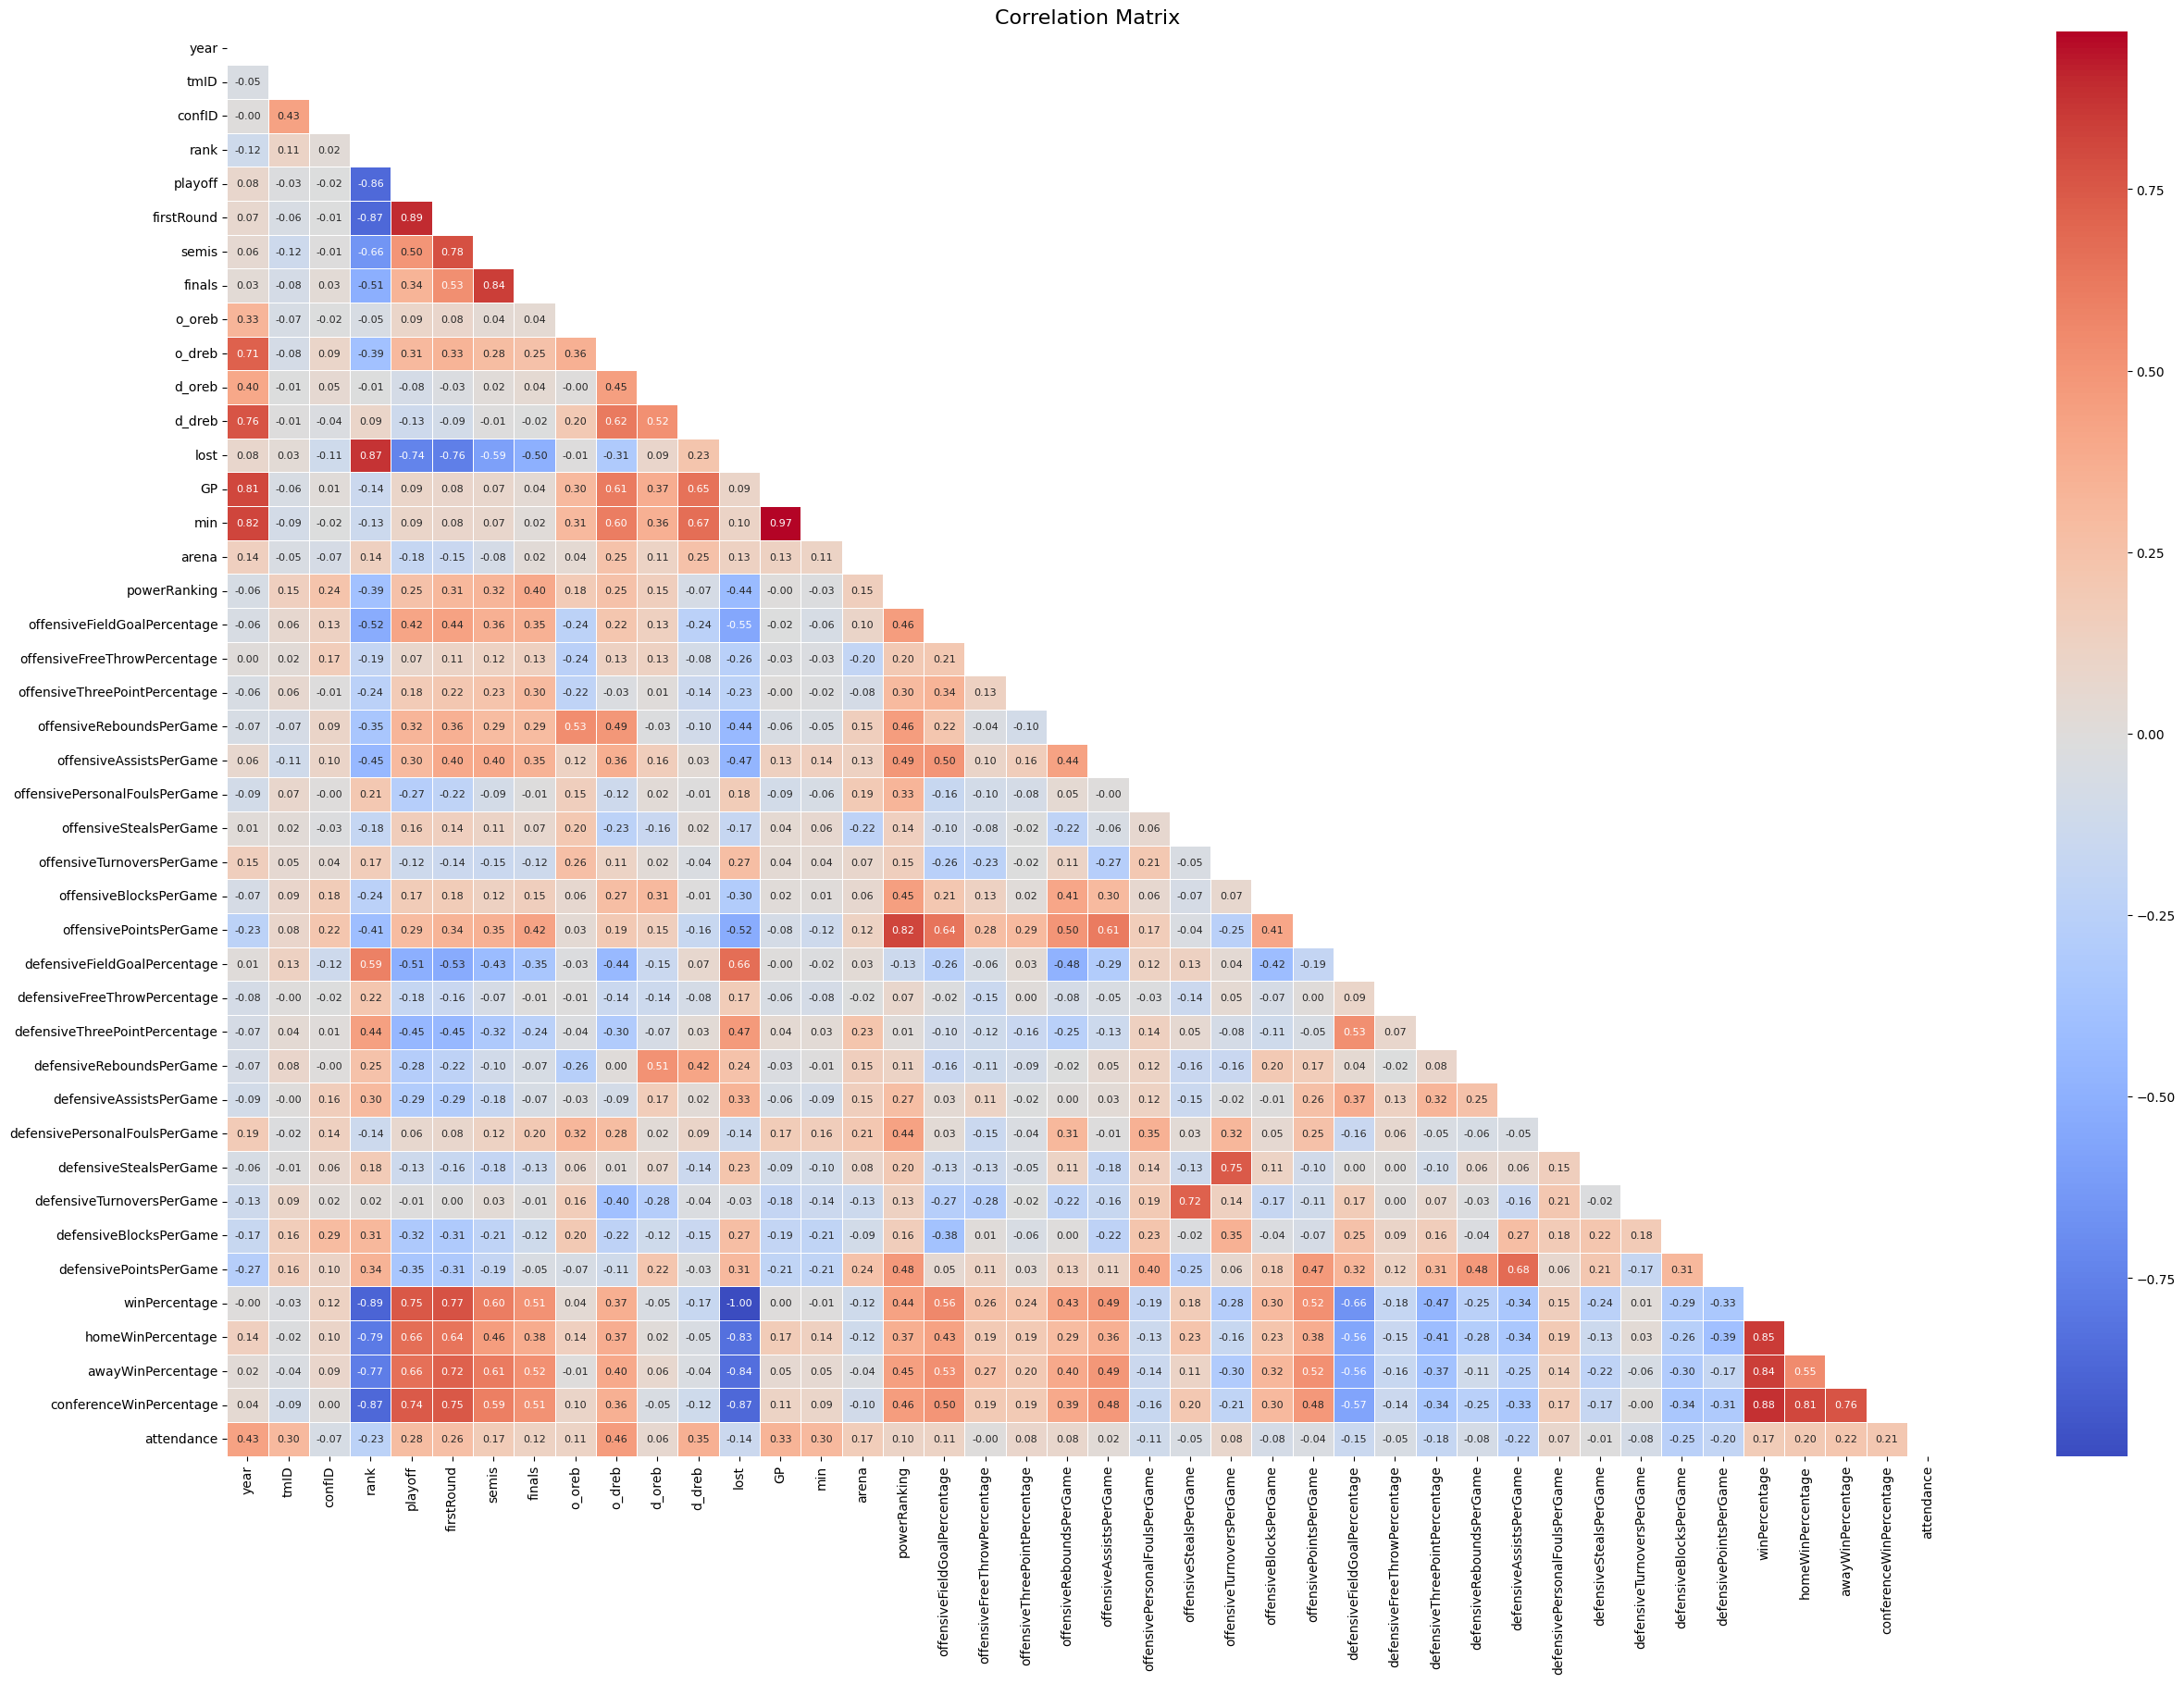

Correlation between target and year: 0.07705063246068848
Correlation between target and tmID: -0.02529934329892212
Correlation between target and confID: -0.016000512024577127
Correlation between target and rank: -0.8620790896686981
Correlation between target and playoff: 1.0
Correlation between target and firstRound: 0.892828570971414
Correlation between target and semis: 0.4970630193302927
Correlation between target and finals: 0.336817912482514
Correlation between target and o_oreb: 0.0923630258772151
Correlation between target and o_dreb: 0.30755716728105326
Correlation between target and d_oreb: -0.07564183752103998
Correlation between target and d_dreb: -0.12850329846395211
Correlation between target and lost: -0.7381220473270342
Correlation between target and GP: 0.09131841461785487
Correlation between target and min: 0.08789020587498408
Correlation between target and arena: -0.1780682469131567
Correlation between target and powerRanking: 0.24832889561370883
Correlation between 

In [31]:
team1 = teams.copy()

for index, team in team1.iterrows(): 
    powerRanking = team_power_ranking(team)

    team1.at[index, 'powerRanking'] = powerRanking[0]
    team1.at[index, 'offensiveFieldGoalPercentage'] = powerRanking[1]
    team1.at[index, 'offensiveFreeThrowPercentage'] = powerRanking[2]
    team1.at[index, 'offensiveThreePointPercentage'] = powerRanking[3]
    team1.at[index, 'offensiveReboundsPerGame'] = powerRanking[4]
    team1.at[index, 'offensiveAssistsPerGame'] = powerRanking[5]
    team1.at[index, 'offensivePersonalFoulsPerGame'] = powerRanking[6]
    team1.at[index, 'offensiveStealsPerGame'] = powerRanking[7]
    team1.at[index, 'offensiveTurnoversPerGame'] = powerRanking[8]
    team1.at[index, 'offensiveBlocksPerGame'] = powerRanking[9]
    team1.at[index, 'offensivePointsPerGame'] = powerRanking[10]
    team1.at[index, 'defensiveFieldGoalPercentage'] = powerRanking[11]
    team1.at[index, 'defensiveFreeThrowPercentage'] = powerRanking[12]
    team1.at[index, 'defensiveThreePointPercentage'] = powerRanking[13]
    team1.at[index, 'defensiveReboundsPerGame'] = powerRanking[14]
    team1.at[index, 'defensiveAssistsPerGame'] = powerRanking[15]
    team1.at[index, 'defensivePersonalFoulsPerGame'] = powerRanking[16]
    team1.at[index, 'defensiveStealsPerGame'] = powerRanking[17]
    team1.at[index, 'defensiveTurnoversPerGame'] = powerRanking[18]
    team1.at[index, 'defensiveBlocksPerGame'] = powerRanking[19]
    team1.at[index, 'defensivePointsPerGame'] = powerRanking[20]
    team1.at[index, 'winPercentage'] = powerRanking[21]
    team1.at[index, 'homeWinPercentage'] = powerRanking[22]
    team1.at[index, 'awayWinPercentage'] = powerRanking[23]
    team1.at[index, 'conferenceWinPercentage'] = powerRanking[24]
    team1.at[index, 'attendance'] = powerRanking[25]


team1 = team1.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'won', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'attend'])
team1 = team1.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])
team1.to_csv('team1.csv', index=False)

features_weight = correlation_matrix(team1)


print("WinPercentage")
# Print winPercentage for each team
for index, row in team1.iterrows():
    print(f"Team ID: {row['tmID']}, Year: {row['year']}, Win Percentage: {row['winPercentage']:.2f}%")

In [24]:
chi_square(team1, 'playoff')

Chi-square test for year and playoff:
Chi-square value: 1.3666430343849703
P-value: 0.9980204687073957
Fail to reject the null hypothesis. There is not enough evidence for a significant association.

Chi-square test for tmID and playoff:
Chi-square value: 32.49763248847927
P-value: 0.027449727442441722
Reject the null hypothesis. There is a significant association.

Chi-square test for confID and playoff:
Chi-square value: 0.00046010944700461995
P-value: 0.9828865593186417
Fail to reject the null hypothesis. There is not enough evidence for a significant association.

Chi-square test for rank and playoff:
Chi-square value: 142.0
P-value: 1.9364424317003396e-27
Reject the null hypothesis. There is a significant association.

Chi-square test for firstRound and playoff:
Chi-square value: 142.0
P-value: 1.4624862272512401e-31
Reject the null hypothesis. There is a significant association.

Chi-square test for semis and playoff:
Chi-square value: 40.21057692307692
P-value: 1.855171928158533

In [25]:
point_biserial(team1, ['powerRanking'], 'playoff')

              correlation   p_value
powerRanking     0.287849  0.000513


This code down below creates a new dataset (``team1_orig``) by removing specific columns from the original team data (``teams_original``). The excluded columns are not so relevant anymore because the power ranking calculated before already has information relating all of them. 


In [26]:
team1_orig = teams_original.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'won', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'attend'])
team1_orig = teams_original.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])
team1_orig = teams_original.drop(columns=['o_oreb', 'o_dreb', 'd_oreb', 'd_dreb', 'lost', 'min'])

team1_orig.to_csv('team1.csv', index=False)

This function calculates a team power ranking based on correlation matrix values and a set of customizable weights for various statistical features. This version provides a more balanced and nuanced assessment compared to the previous approach, allowing for greater flexibility in evaluating different aspects of the teams performance by considering the relationships between variables.

In [27]:
def team_power_ranking_2(team, variables_weight): 
    
    year = team['year']

    offensiveFieldGoalPercentage = (team['o_fgm'] / team['o_fga']) * 100
    offensiveFieldGoalPercentage = (offensiveFieldGoalPercentage - yearly_stats[year]['offensiveFieldGoalPercentage']['min']) / (
                yearly_stats[year]['offensiveFieldGoalPercentage']['max'] - yearly_stats[year]['offensiveFieldGoalPercentage']['min']) * 100

    offensiveFreeThrowPercentage = (team['o_ftm'] / team['o_fta']) * 100
    offensiveFreeThrowPercentage = (offensiveFreeThrowPercentage - yearly_stats[year]['offensiveFreeThrowPercentage']['min']) / (
                yearly_stats[year]['offensiveFreeThrowPercentage']['max'] - yearly_stats[year]['offensiveFreeThrowPercentage']['min']) * 100

    offensiveThreePointPercentage = (team['o_3pm'] / team['o_3pa']) * 100
    offensiveThreePointPercentage = (offensiveThreePointPercentage - yearly_stats[year]['offensiveThreePointPercentage']['min']) / (
                yearly_stats[year]['offensiveThreePointPercentage']['max'] - yearly_stats[year]['offensiveThreePointPercentage']['min']) * 100

    offensiveReboundsPerGame = team['o_reb'] / team['GP']
    offensiveReboundsPerGame = (offensiveReboundsPerGame - yearly_stats[year]['offensiveReboundsPerGame']['min']) / (
                yearly_stats[year]['offensiveReboundsPerGame']['max'] - yearly_stats[year]['offensiveReboundsPerGame']['min']) * 100

    offensiveAssistsPerGame = team['o_asts'] / team['GP']
    offensiveAssistsPerGame = (offensiveAssistsPerGame - yearly_stats[year]['offensiveAssistsPerGame']['min']) / (
                yearly_stats[year]['offensiveAssistsPerGame']['max'] - yearly_stats[year]['offensiveAssistsPerGame']['min']) * 100

    offensivePersonalFoulsPerGame = team['o_pf'] / team['GP']
    offensivePersonalFoulsPerGame = (offensivePersonalFoulsPerGame - yearly_stats[year]['offensivePersonalFoulsPerGame']['min']) / (
                yearly_stats[year]['offensivePersonalFoulsPerGame']['max'] - yearly_stats[year]['offensivePersonalFoulsPerGame']['min']) * 100

    offensiveStealsPerGame = team['o_stl'] / team['GP']
    offensiveStealsPerGame = (offensiveStealsPerGame - yearly_stats[year]['offensiveStealsPerGame']['min']) / (
                yearly_stats[year]['offensiveStealsPerGame']['max'] - yearly_stats[year]['offensiveStealsPerGame']['min']) * 100

    offensiveTurnoversPerGame = team['o_to'] / team['GP']
    offensiveTurnoversPerGame = (offensiveTurnoversPerGame - yearly_stats[year]['offensiveTurnoversPerGame']['min']) / (
                yearly_stats[year]['offensiveTurnoversPerGame']['max'] - yearly_stats[year]['offensiveTurnoversPerGame']['min']) * 100

    offensiveBlocksPerGame = team['o_blk'] / team['GP']
    offensiveBlocksPerGame = (offensiveBlocksPerGame - yearly_stats[year]['offensiveBlocksPerGame']['min']) / (
                yearly_stats[year]['offensiveBlocksPerGame']['max'] - yearly_stats[year]['offensiveBlocksPerGame']['min']) * 100

    offensivePointsPerGame = team['o_pts'] / team['GP']
    offensivePointsPerGame = (offensivePointsPerGame - yearly_stats[year]['offensivePointsPerGame']['min']) / (
                yearly_stats[year]['offensivePointsPerGame']['max'] - yearly_stats[year]['offensivePointsPerGame']['min']) * 100

    # defensive stats
    defensiveFieldGoalPercentage = (team['d_fgm'] / team['d_fga']) * 100
    defensiveFieldGoalPercentage = (defensiveFieldGoalPercentage - yearly_stats[year]['defensiveFieldGoalPercentage']['min']) / (
                yearly_stats[year]['defensiveFieldGoalPercentage']['max'] - yearly_stats[year]['defensiveFieldGoalPercentage']['min']) * 100

    defensiveFreeThrowPercentage = (team['d_ftm'] / team['d_fta']) * 100
    defensiveFreeThrowPercentage = (defensiveFreeThrowPercentage - yearly_stats[year]['defensiveFreeThrowPercentage']['min']) / (
                yearly_stats[year]['defensiveFreeThrowPercentage']['max'] - yearly_stats[year]['defensiveFreeThrowPercentage']['min']) * 100

    defensiveThreePointPercentage = (team['d_3pm'] / team['d_3pa']) * 100
    defensiveThreePointPercentage = (defensiveThreePointPercentage - yearly_stats[year]['defensiveThreePointPercentage']['min']) / (
                yearly_stats[year]['defensiveThreePointPercentage']['max'] - yearly_stats[year]['defensiveThreePointPercentage']['min']) * 100

    defensiveReboundsPerGame = team['d_reb'] / team['GP']
    defensiveReboundsPerGame = (defensiveReboundsPerGame - yearly_stats[year]['defensiveReboundsPerGame']['min']) / (
                yearly_stats[year]['defensiveReboundsPerGame']['max'] - yearly_stats[year]['defensiveReboundsPerGame']['min']) * 100

    defensiveAssistsPerGame = team['d_asts'] / team['GP']
    defensiveAssistsPerGame = (defensiveAssistsPerGame - yearly_stats[year]['defensiveAssistsPerGame']['min']) / (
                yearly_stats[year]['defensiveAssistsPerGame']['max'] - yearly_stats[year]['defensiveAssistsPerGame']['min']) * 100

    defensivePersonalFoulsPerGame = team['d_pf'] / team['GP']
    defensivePersonalFoulsPerGame = (defensivePersonalFoulsPerGame - yearly_stats[year]['defensivePersonalFoulsPerGame']['min']) / (
                yearly_stats[year]['defensivePersonalFoulsPerGame']['max'] - yearly_stats[year]['defensivePersonalFoulsPerGame']['min']) * 100

    defensiveStealsPerGame = team['d_stl'] / team['GP']
    defensiveStealsPerGame = (defensiveStealsPerGame - yearly_stats[year]['defensiveStealsPerGame']['min']) / (
                yearly_stats[year]['defensiveStealsPerGame']['max'] - yearly_stats[year]['defensiveStealsPerGame']['min']) * 100

    defensiveTurnoversPerGame = team['d_to'] / team['GP']
    defensiveTurnoversPerGame = (defensiveTurnoversPerGame - yearly_stats[year]['defensiveTurnoversPerGame']['min']) / (
                yearly_stats[year]['defensiveTurnoversPerGame']['max'] - yearly_stats[year]['defensiveTurnoversPerGame']['min']) * 100

    defensiveBlocksPerGame = team['d_blk'] / team['GP']
    defensiveBlocksPerGame = (defensiveBlocksPerGame - yearly_stats[year]['defensiveBlocksPerGame']['min']) / (
                yearly_stats[year]['defensiveBlocksPerGame']['max'] - yearly_stats[year]['defensiveBlocksPerGame']['min']) * 100

    defensivePointsPerGame = team['d_pts'] / team['GP']
    defensivePointsPerGame = (defensivePointsPerGame - yearly_stats[year]['defensivePointsPerGame']['min']) / (
                yearly_stats[year]['defensivePointsPerGame']['max'] - yearly_stats[year]['defensivePointsPerGame']['min']) * 100


    # global stats
    winPercentage = team['won'] / team['GP'] * 100
    winPercentage = (winPercentage - yearly_stats[year]['winPercentage']['min']) / (
                yearly_stats[year]['winPercentage']['max'] - yearly_stats[year]['winPercentage']['min']) * 100

    homeWinPercentage = team['homeW'] / (team['homeW'] + team['homeL']) * 100
    homeWinPercentage = (homeWinPercentage - yearly_stats[year]['homeWinPercentage']['min']) / (
                yearly_stats[year]['homeWinPercentage']['max'] - yearly_stats[year]['homeWinPercentage']['min']) * 100

    awayWinPercentage = team['awayW'] / (team['awayW'] + team['awayL']) * 100
    awayWinPercentage = (awayWinPercentage - yearly_stats[year]['awayWinPercentage']['min']) / (
                yearly_stats[year]['awayWinPercentage']['max'] - yearly_stats[year]['awayWinPercentage']['min']) * 100

    conferenceWinPercentage = team['confW'] / (team['confW'] + team['confL']) * 100
    conferenceWinPercentage = (conferenceWinPercentage - yearly_stats[year]['conferenceWinPercentage']['min']) / (
                yearly_stats[year]['conferenceWinPercentage']['max'] - yearly_stats[year]['conferenceWinPercentage']['min']) * 100

    attendance = (team['attend'] - yearly_stats[year]['attendance']['min']) / (
                yearly_stats[year]['attendance']['max'] - yearly_stats[year]['attendance']['min']) * 100

    firstRoundValue = 0
    semisValue = 0
    finalsValue = 0

    if team['firstRound'] == '' or team['firstRound'] is None or team['firstRound'] == -1.0: 
        firstRoundValue = 0
        semisValue = 0
        finalsValue = 0
    elif team['firstRound'] == 'L' or team['firstRound'] == 0.0:
        firstRoundValue = 5
        semisValue = 0
        finalsValue = 0
    else: 
        if team['semis'] == '' or team['semis'] is None or team['semis'] == -1.0: 
            firstRoundValue = 10
            semisValue = 0
            finalsValue = 0
        elif team['semis'] == 'L' or team['semis'] == 0.0:
            firstRoundValue = 10
            semisValue = 5
            finalsValue = 0
        else: 
            if team['finals'] == '' or team['finals'] is None or team['finals'] == -1.0: 
                firstRoundValue = 10
                semisValue = 10
                finalsValue = 0
            elif team['finals'] == 'L' or team['finals'] == 0.0:
                firstRoundValue = 10
                semisValue = 10
                finalsValue = 5
            else: 
                firstRoundValue = 10
                semisValue = 10
                finalsValue = 10

    rankValue = rankMax / team['rank'] 

    o_orebPercentage = (team['o_oreb'] - o_orebMin) / (o_orebMax - o_orebMin) * 100

    o_drebPercentage = (team['o_dreb'] - o_drebMin) / (o_drebMax - o_drebMin) * 100

    d_orebPercentage = (team['d_oreb'] - d_orebMin) / (d_orebMax - d_orebMin) * 100

    d_drebPercentage = (team['d_dreb'] - d_drebMin) / (d_drebMax - d_drebMin) * 100

    relevantFeatures = {'offensiveFieldGoalPercentage': offensiveFieldGoalPercentage,
        'offensiveFreeThrowPercentage': offensiveFreeThrowPercentage,
        'offensiveThreePointPercentage': offensiveThreePointPercentage,
        'offensiveReboundsPerGame': offensiveReboundsPerGame,
        'offensiveAssistsPerGame': offensiveAssistsPerGame,
        'offensivePersonalFoulsPerGame': offensivePersonalFoulsPerGame,
        'offensiveStealsPerGame': offensiveStealsPerGame,
        'offensiveTurnoversPerGame': offensiveTurnoversPerGame,
        'offensiveBlocksPerGame': offensiveBlocksPerGame,
        'offensivePointsPerGame': offensivePointsPerGame,
        'defensiveFieldGoalPercentage': defensiveFieldGoalPercentage,
        'defensiveFreeThrowPercentage': defensiveFreeThrowPercentage,
        'defensiveThreePointPercentage': defensiveThreePointPercentage,
        'defensiveReboundsPerGame': defensiveReboundsPerGame,
        'defensiveAssistsPerGame': defensiveAssistsPerGame,
        'defensivePersonalFoulsPerGame': defensivePersonalFoulsPerGame,
        'defensiveStealsPerGame': defensiveStealsPerGame,
        'defensiveTurnoversPerGame': defensiveTurnoversPerGame,
        'defensiveBlocksPerGame': defensiveBlocksPerGame,
        'defensivePointsPerGame': defensivePointsPerGame,
        'winPercentage': winPercentage,
        'homeWinPercentage': homeWinPercentage,
        'awayWinPercentage': awayWinPercentage,
        'conferenceWinPercentage': conferenceWinPercentage,
        'attendance': attendance,
        'firstRound': firstRoundValue,
        'semis': semisValue,
        'finals': finalsValue, 
        'rank': rankValue, 
        'o_oreb': o_orebPercentage,
        'o_dreb': o_drebPercentage,
        'd_oreb': d_orebPercentage,
        'd_dreb': d_drebPercentage
    }

    powerRankingAccumulator = 0

    for feature_name, feature_value in relevantFeatures.items():
        powerRankingAccumulator += feature_value * float(variables_weight[feature_name])

    relevantFeatures['powerRanking2'] = powerRankingAccumulator

    print(relevantFeatures)

    return relevantFeatures

The process involves: 

- Iterate through each team in the dataset (team2).
- Calculate a power ranking for each team using the ``team_power_ranking_2`` funtion.
- Updates the team2 DataFrame with the calculated metrics for each team.
- Removes redundant or unnecessary columns from the DataFrame to streamline and focus on relevant features.
- Generates a new correlation matrix (features_weight) based on the updated team2 DataFrame, which will be used in subsequent analyses.

{'offensiveFieldGoalPercentage': 0.0, 'offensiveFreeThrowPercentage': 51.33506892937555, 'offensiveThreePointPercentage': 36.626847672400345, 'offensiveReboundsPerGame': 0.0, 'offensiveAssistsPerGame': 13.571428571428562, 'offensivePersonalFoulsPerGame': 100.0, 'offensiveStealsPerGame': 65.48672566371683, 'offensiveTurnoversPerGame': 73.33333333333336, 'offensiveBlocksPerGame': 46.762589928057565, 'offensivePointsPerGame': 25.85669781931467, 'defensiveFieldGoalPercentage': 99.51185191281441, 'defensiveFreeThrowPercentage': 0.0, 'defensiveThreePointPercentage': 62.26887860731829, 'defensiveReboundsPerGame': 85.20179372197302, 'defensiveAssistsPerGame': 100.0, 'defensivePersonalFoulsPerGame': 73.72262773722626, 'defensiveStealsPerGame': 95.29411764705884, 'defensiveTurnoversPerGame': 49.60000000000003, 'defensiveBlocksPerGame': 29.411764705882366, 'defensivePointsPerGame': 78.44112769485902, 'winPercentage': 0.0, 'homeWinPercentage': 0.0, 'awayWinPercentage': 0.0, 'conferenceWinPercentag

/home/ze/.local/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


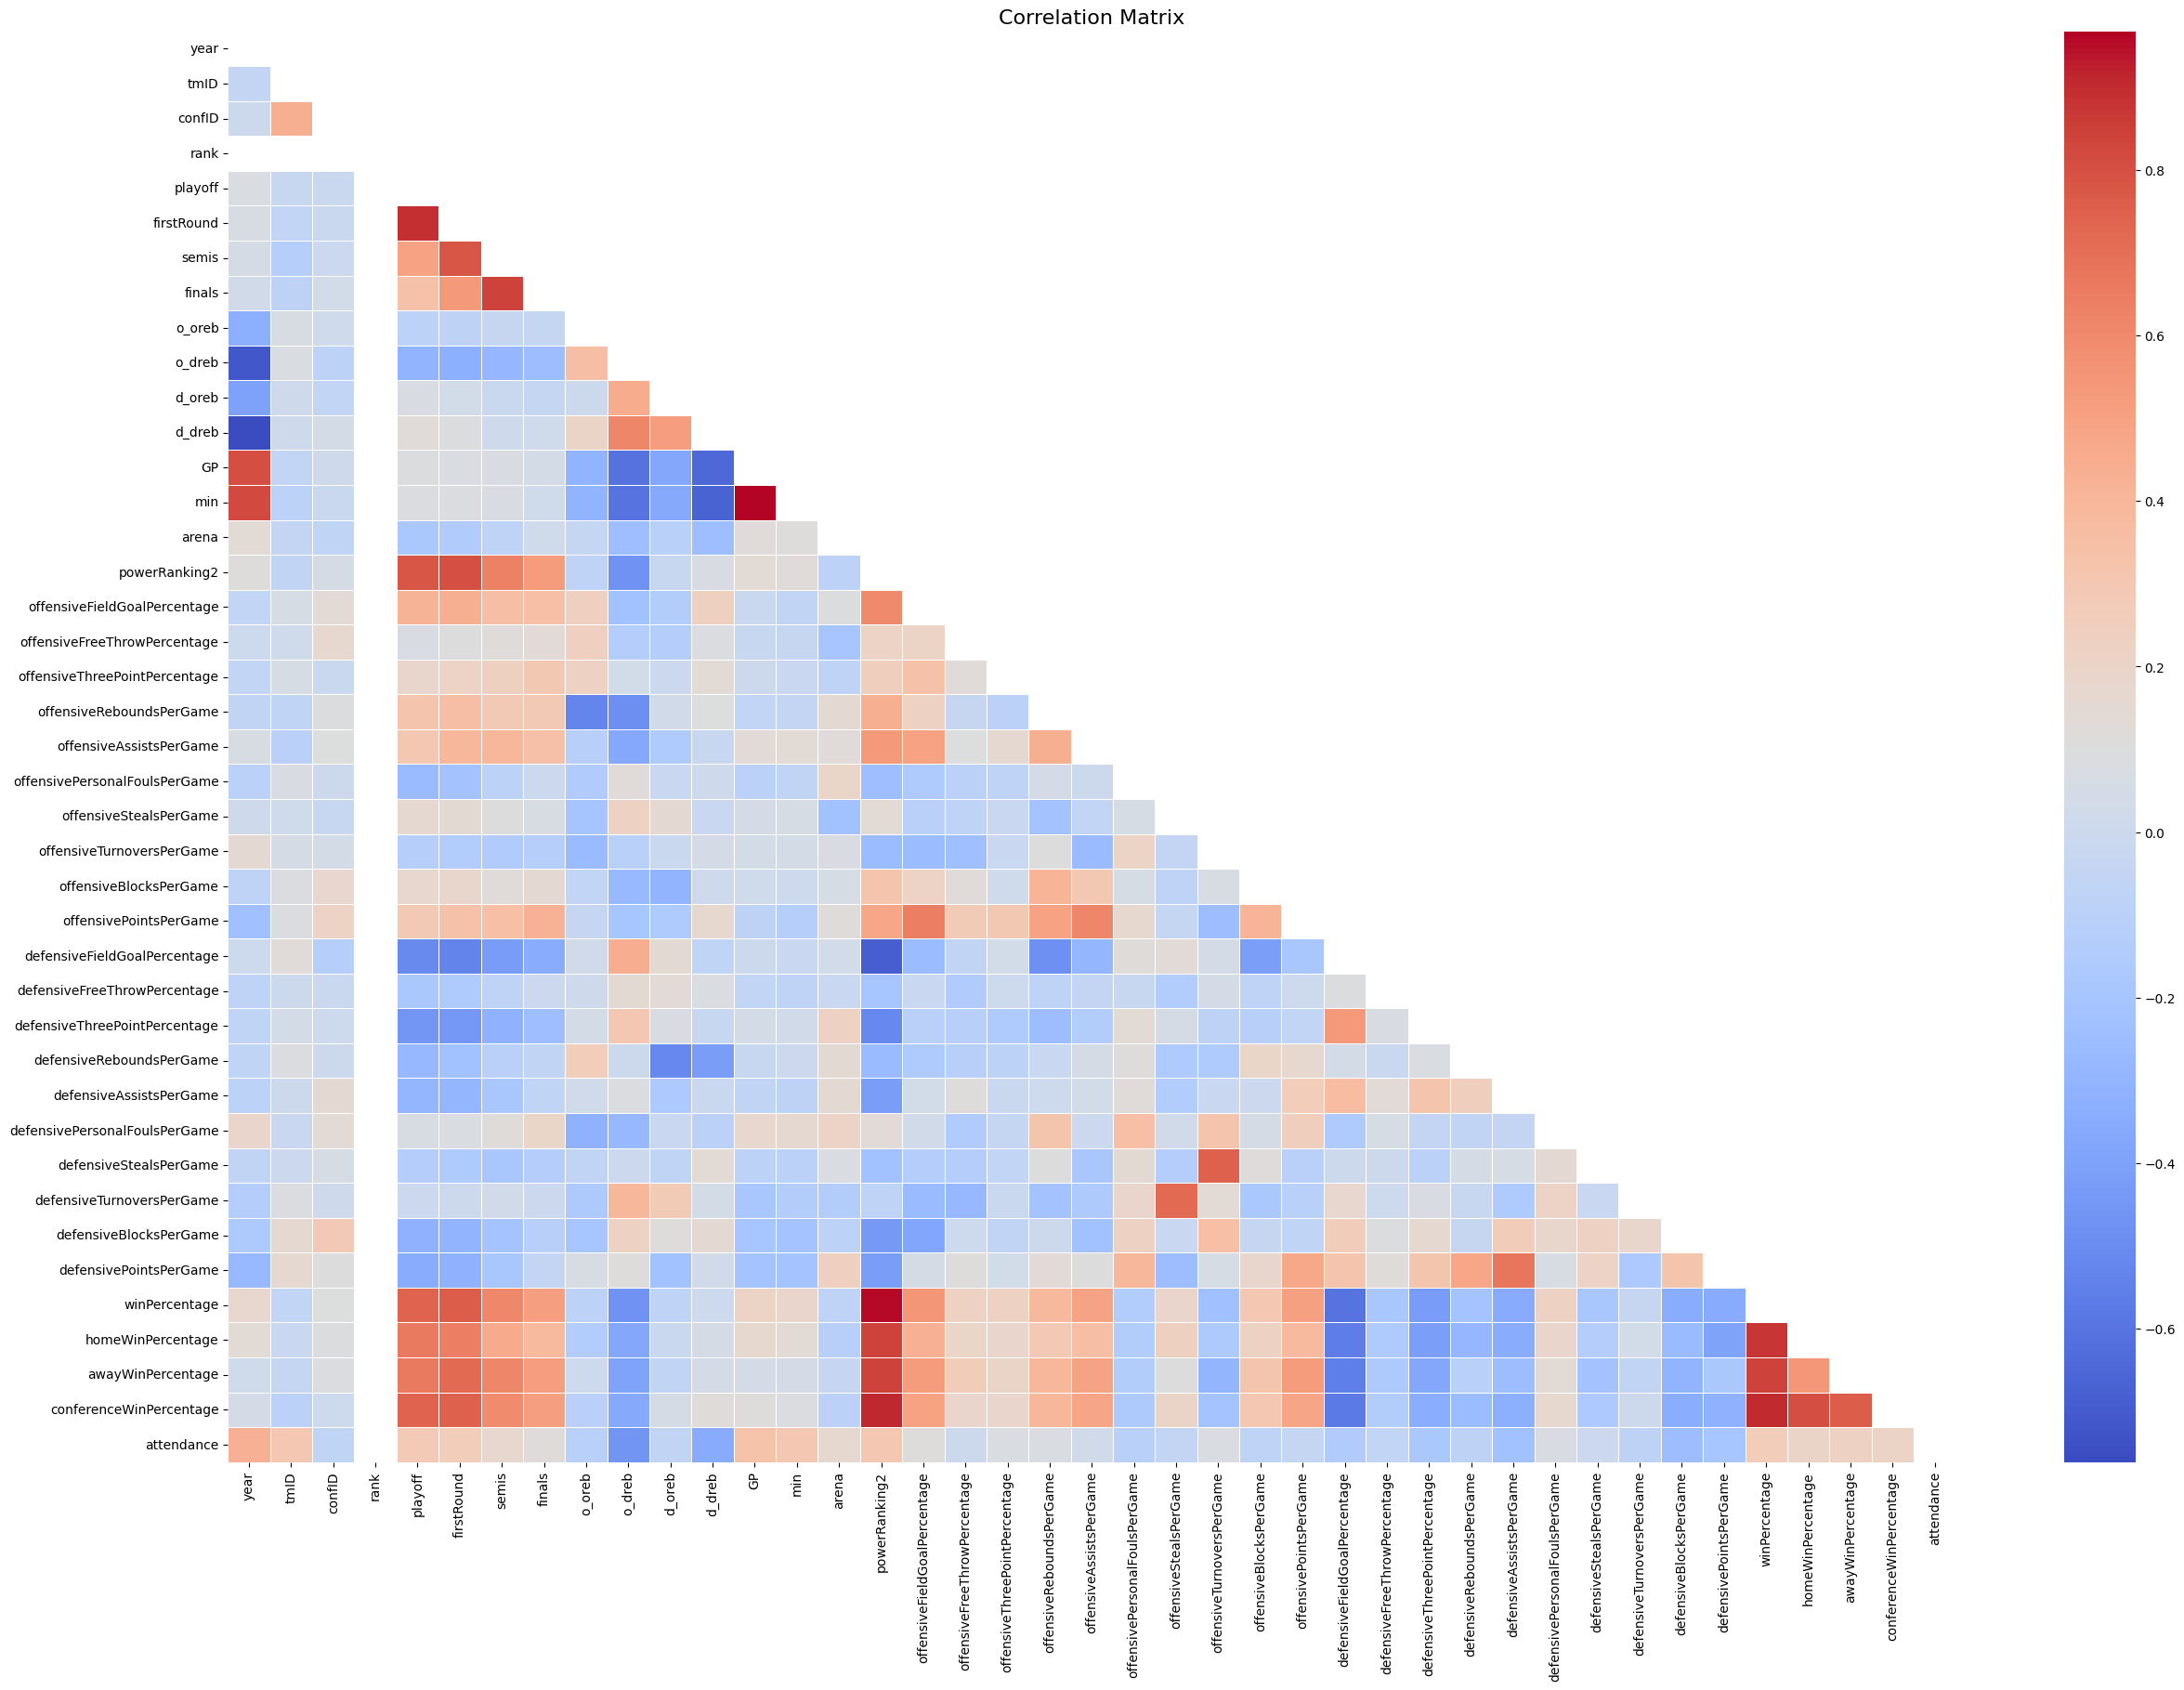

Correlation between target and year: 0.07705063246068848
Correlation between target and tmID: -0.02529934329892212
Correlation between target and confID: -0.016000512024577127
Correlation between target and rank: nan
Correlation between target and playoff: 1.0
Correlation between target and firstRound: 0.8928285709714135
Correlation between target and semis: 0.49706301933029234
Correlation between target and finals: 0.33681791248251397
Correlation between target and o_oreb: -0.09236302587721501
Correlation between target and o_dreb: -0.3075571672810532
Correlation between target and d_oreb: 0.07564183752103942
Correlation between target and d_dreb: 0.12850329846395225
Correlation between target and GP: 0.09131841461785487
Correlation between target and min: 0.08789020587498408
Correlation between target and arena: -0.1780682469131567
Correlation between target and powerRanking2: 0.778807390709261
Correlation between target and offensiveFieldGoalPercentage: 0.41836264125070516
Correlati

In [ ]:
team2 = teams.copy()

for index, team in team2.iterrows(): 
    powerRanking = team_power_ranking_2(team, features_weight)

    team2.at[index, 'powerRanking2'] = powerRanking['powerRanking2']
    team2.at[index, 'offensiveFieldGoalPercentage'] = powerRanking['offensiveFieldGoalPercentage']
    team2.at[index, 'offensiveFreeThrowPercentage'] = powerRanking['offensiveFreeThrowPercentage']
    team2.at[index, 'offensiveThreePointPercentage'] = powerRanking['offensiveThreePointPercentage']
    team2.at[index, 'offensiveReboundsPerGame'] = powerRanking['offensiveReboundsPerGame']
    team2.at[index, 'offensiveAssistsPerGame'] = powerRanking['offensiveAssistsPerGame']
    team2.at[index, 'offensivePersonalFoulsPerGame'] = powerRanking['offensivePersonalFoulsPerGame']
    team2.at[index, 'offensiveStealsPerGame'] = powerRanking['offensiveStealsPerGame']
    team2.at[index, 'offensiveTurnoversPerGame'] = powerRanking['offensiveTurnoversPerGame']
    team2.at[index, 'offensiveBlocksPerGame'] = powerRanking['offensiveBlocksPerGame']
    team2.at[index, 'offensivePointsPerGame'] = powerRanking['offensivePointsPerGame']
    team2.at[index, 'defensiveFieldGoalPercentage'] = powerRanking['defensiveFieldGoalPercentage']
    team2.at[index, 'defensiveFreeThrowPercentage'] = powerRanking['defensiveFreeThrowPercentage']
    team2.at[index, 'defensiveThreePointPercentage'] = powerRanking['defensiveThreePointPercentage']
    team2.at[index, 'defensiveReboundsPerGame'] = powerRanking['defensiveReboundsPerGame']
    team2.at[index, 'defensiveAssistsPerGame'] = powerRanking['defensiveAssistsPerGame']
    team2.at[index, 'defensivePersonalFoulsPerGame'] = powerRanking['defensivePersonalFoulsPerGame']
    team2.at[index, 'defensiveStealsPerGame'] = powerRanking['defensiveStealsPerGame']
    team2.at[index, 'defensiveTurnoversPerGame'] = powerRanking['defensiveTurnoversPerGame']
    team2.at[index, 'defensiveBlocksPerGame'] = powerRanking['defensiveBlocksPerGame']
    team2.at[index, 'defensivePointsPerGame'] = powerRanking['defensivePointsPerGame']
    team2.at[index, 'winPercentage'] = powerRanking['winPercentage']
    team2.at[index, 'homeWinPercentage'] = powerRanking['homeWinPercentage']
    team2.at[index, 'awayWinPercentage'] = powerRanking['awayWinPercentage']
    team2.at[index, 'conferenceWinPercentage'] = powerRanking['conferenceWinPercentage']
    team2.at[index, 'attendance'] = powerRanking['attendance']
    team2.at[index, 'firstRound'] = powerRanking['firstRound']
    team2.at[index, 'semis'] = powerRanking['semis']
    team2.at[index, 'finals'] = powerRanking['finals']
    team2.at[index, 'rank'] = powerRanking['rank']
    team2.at[index, 'o_oreb'] = powerRanking['o_oreb']
    team2.at[index, 'o_dreb'] = powerRanking['o_dreb']
    team2.at[index, 'd_oreb'] = powerRanking['d_oreb']
    team2.at[index, 'd_dreb'] = powerRanking['d_dreb']


team2 = team2.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'won', 'lost', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'attend'])
team2 = team2.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])

features_weight = correlation_matrix(team2)






In this section we do the same as we done before but specifically applied to the original dataset (``teams_original``). It calculates power rankings based on correlation matrix values and updates the original dataset with the computed metrics. The unnecessary or redundant columns are then removed for further analysis.

In [29]:
for index, team in teams_original.iterrows(): 
    powerRanking = team_power_ranking_2(team, features_weight)

    teams_original.at[index, 'powerRanking2'] = powerRanking['powerRanking2']
    teams_original.at[index, 'offensiveFieldGoalPercentage'] = powerRanking['offensiveFieldGoalPercentage']
    teams_original.at[index, 'offensiveFreeThrowPercentage'] = powerRanking['offensiveFreeThrowPercentage']
    teams_original.at[index, 'offensiveThreePointPercentage'] = powerRanking['offensiveThreePointPercentage']
    teams_original.at[index, 'offensiveReboundsPerGame'] = powerRanking['offensiveReboundsPerGame']
    teams_original.at[index, 'offensiveAssistsPerGame'] = powerRanking['offensiveAssistsPerGame']
    teams_original.at[index, 'offensivePersonalFoulsPerGame'] = powerRanking['offensivePersonalFoulsPerGame']
    teams_original.at[index, 'offensiveStealsPerGame'] = powerRanking['offensiveStealsPerGame']
    teams_original.at[index, 'offensiveTurnoversPerGame'] = powerRanking['offensiveTurnoversPerGame']
    teams_original.at[index, 'offensiveBlocksPerGame'] = powerRanking['offensiveBlocksPerGame']
    teams_original.at[index, 'offensivePointsPerGame'] = powerRanking['offensivePointsPerGame']
    teams_original.at[index, 'defensiveFieldGoalPercentage'] = powerRanking['defensiveFieldGoalPercentage']
    teams_original.at[index, 'defensiveFreeThrowPercentage'] = powerRanking['defensiveFreeThrowPercentage']
    teams_original.at[index, 'defensiveThreePointPercentage'] = powerRanking['defensiveThreePointPercentage']
    teams_original.at[index, 'defensiveReboundsPerGame'] = powerRanking['defensiveReboundsPerGame']
    teams_original.at[index, 'defensiveAssistsPerGame'] = powerRanking['defensiveAssistsPerGame']
    teams_original.at[index, 'defensivePersonalFoulsPerGame'] = powerRanking['defensivePersonalFoulsPerGame']
    teams_original.at[index, 'defensiveStealsPerGame'] = powerRanking['defensiveStealsPerGame']
    teams_original.at[index, 'defensiveTurnoversPerGame'] = powerRanking['defensiveTurnoversPerGame']
    teams_original.at[index, 'defensiveBlocksPerGame'] = powerRanking['defensiveBlocksPerGame']
    teams_original.at[index, 'defensivePointsPerGame'] = powerRanking['defensivePointsPerGame']
    teams_original.at[index, 'winPercentage'] = powerRanking['winPercentage']
    teams_original.at[index, 'homeWinPercentage'] = powerRanking['homeWinPercentage']
    teams_original.at[index, 'awayWinPercentage'] = powerRanking['awayWinPercentage']
    teams_original.at[index, 'conferenceWinPercentage'] = powerRanking['conferenceWinPercentage']
    teams_original.at[index, 'attendance'] = powerRanking['attendance']


teams_original = teams_original.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts', 'won', 'lost', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL', 'attend'])
teams_original = teams_original.drop(columns=['lgID', 'divID', 'seeded', 'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'])

{'offensiveFieldGoalPercentage': 0.0, 'offensiveFreeThrowPercentage': 51.33506892937555, 'offensiveThreePointPercentage': 36.626847672400345, 'offensiveReboundsPerGame': 0.0, 'offensiveAssistsPerGame': 13.571428571428562, 'offensivePersonalFoulsPerGame': 100.0, 'offensiveStealsPerGame': 65.48672566371683, 'offensiveTurnoversPerGame': 73.33333333333336, 'offensiveBlocksPerGame': 46.762589928057565, 'offensivePointsPerGame': 25.85669781931467, 'defensiveFieldGoalPercentage': 99.51185191281441, 'defensiveFreeThrowPercentage': 0.0, 'defensiveThreePointPercentage': 62.26887860731829, 'defensiveReboundsPerGame': 85.20179372197302, 'defensiveAssistsPerGame': 100.0, 'defensivePersonalFoulsPerGame': 73.72262773722626, 'defensiveStealsPerGame': 95.29411764705884, 'defensiveTurnoversPerGame': 49.60000000000003, 'defensiveBlocksPerGame': 29.411764705882366, 'defensivePointsPerGame': 78.44112769485902, 'winPercentage': 0.0, 'homeWinPercentage': 0.0, 'awayWinPercentage': 0.0, 'conferenceWinPercentag

Now we have a much shorter dataframe, but as we can see the relation between minutes and games played is really big, so we can delete games played. 

/home/ze/.local/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


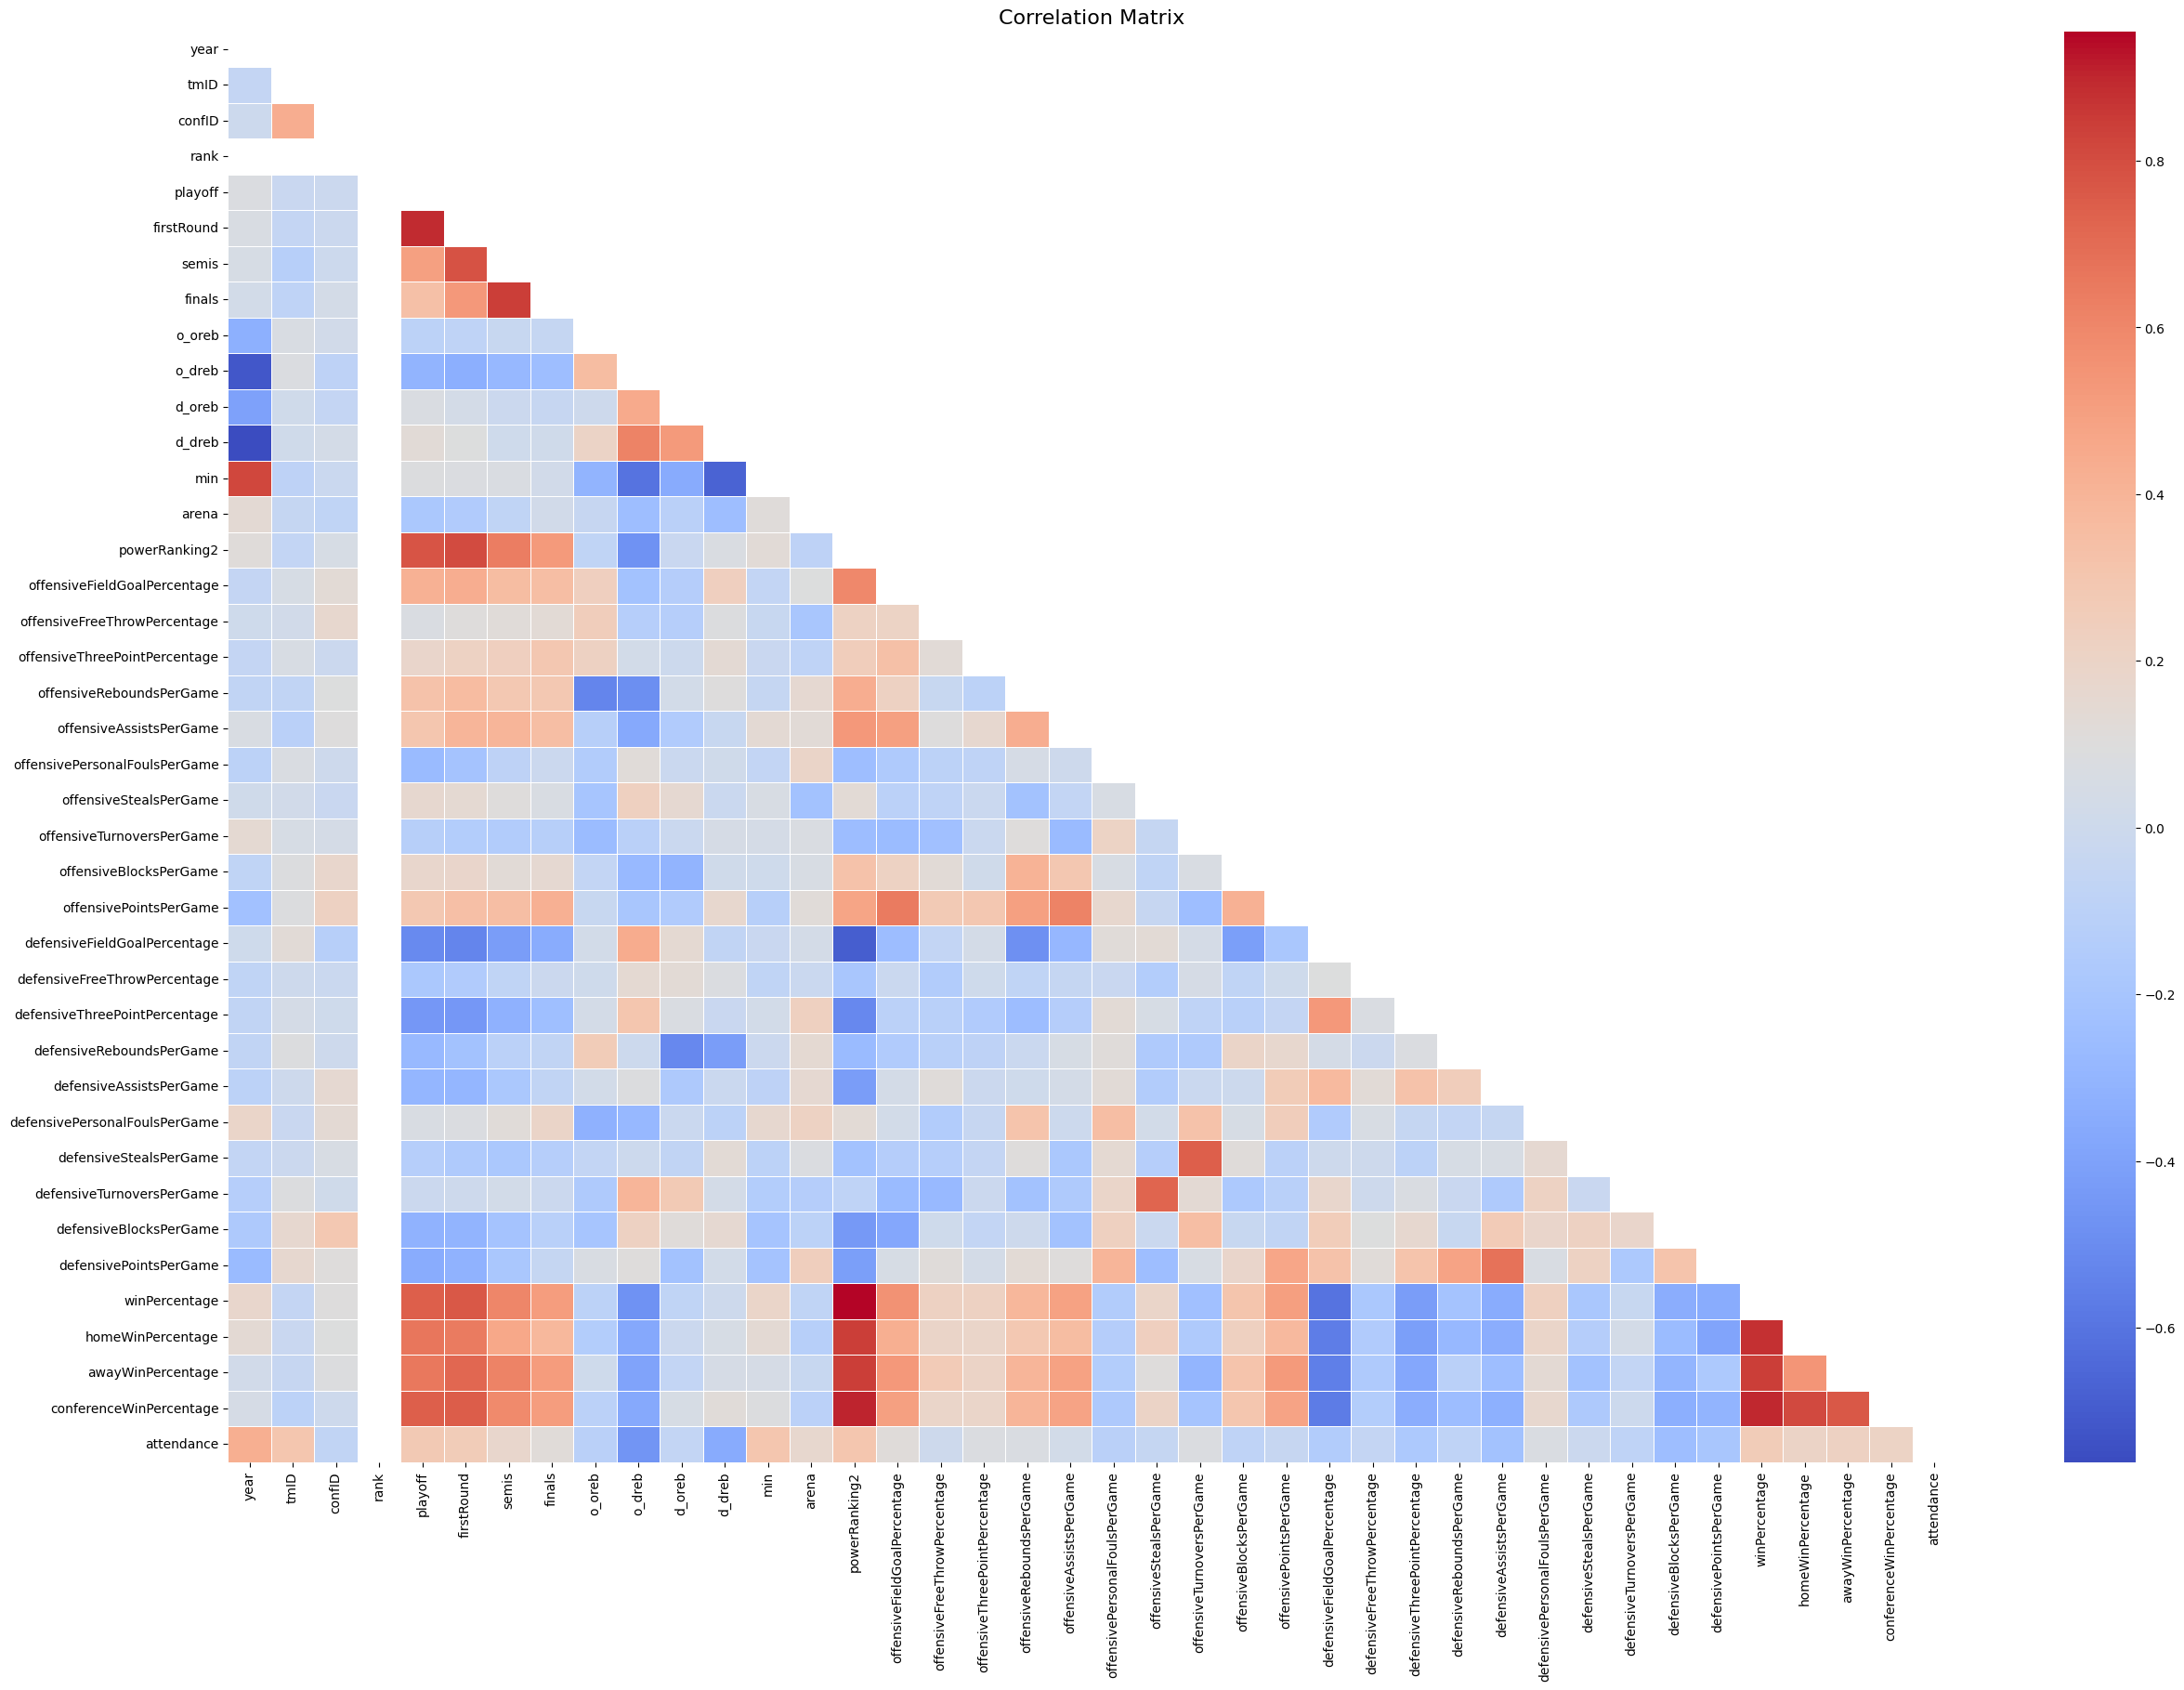

Correlation between target and year: 0.07705063246068848
Correlation between target and tmID: -0.02529934329892212
Correlation between target and confID: -0.016000512024577127
Correlation between target and rank: nan
Correlation between target and playoff: 1.0
Correlation between target and firstRound: 0.8928285709714135
Correlation between target and semis: 0.49706301933029234
Correlation between target and finals: 0.33681791248251397
Correlation between target and o_oreb: -0.09236302587721501
Correlation between target and o_dreb: -0.3075571672810532
Correlation between target and d_oreb: 0.07564183752103942
Correlation between target and d_dreb: 0.12850329846395225
Correlation between target and min: 0.08789020587498408
Correlation between target and arena: -0.1780682469131567
Correlation between target and powerRanking2: 0.778807390709261
Correlation between target and offensiveFieldGoalPercentage: 0.41836264125070516
Correlation between target and offensiveFreeThrowPercentage: 0.0

In [30]:
team2 = team2.drop('GP', axis=1)
teams_original = teams_original.drop('GP', axis=1)
#team2.to_csv('filtered/team2.csv', index=False)
correlation_matrix(team2)

teams_original.to_csv('filtered/team2.csv', index=False)

In [31]:
chi_square(team2, 'playoff')

Chi-square test for year and playoff:
Chi-square value: 1.3666430343849703
P-value: 0.9980204687073957
Fail to reject the null hypothesis. There is not enough evidence for a significant association.

Chi-square test for tmID and playoff:
Chi-square value: 32.49763248847927
P-value: 0.027449727442441722
Reject the null hypothesis. There is a significant association.

Chi-square test for confID and playoff:
Chi-square value: 0.00046010944700461995
P-value: 0.9828865593186417
Fail to reject the null hypothesis. There is not enough evidence for a significant association.

Chi-square test for rank and playoff:
Chi-square value: 0.0
P-value: 1.0
Fail to reject the null hypothesis. There is not enough evidence for a significant association.

Chi-square test for firstRound and playoff:
Chi-square value: 142.0
P-value: 1.4624862272512401e-31
Reject the null hypothesis. There is a significant association.

Chi-square test for semis and playoff:
Chi-square value: 40.21057692307692
P-value: 1.8551

In [32]:
point_biserial(team2, team2.columns, 'playoff')

                               correlation       p_value
year                              0.077051  3.620822e-01
tmID                             -0.025299  7.650471e-01
confID                           -0.016001  8.500968e-01
rank                                   NaN           NaN
playoff                           1.000000  0.000000e+00
firstRound                        0.892829  2.398164e-50
semis                             0.497063  3.130200e-10
finals                            0.336818  4.156818e-05
o_oreb                           -0.092363  2.742871e-01
o_dreb                           -0.307557  1.966872e-04
d_oreb                            0.075642  3.709516e-01
d_dreb                            0.128503  1.274875e-01
min                               0.087890  2.982981e-01
arena                            -0.178068  3.399359e-02
powerRanking2                     0.778807  3.781603e-30
offensiveFieldGoalPercentage      0.418363  2.207625e-07
offensiveFreeThrowPercentage   

/usr/lib/python3/dist-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [33]:
team2.to_csv('team2.csv', index=False)

#team2 = shift_target_variable(team2)

point_biserial(team2, ['powerRanking2'], 'playoff')

               correlation       p_value
powerRanking2     0.778807  3.781603e-30


In [34]:
teams_original['firstRound'] = team2['firstRound']
teams_original['semis'] = team2['semis']
teams_original['finals'] = team2['finals']
teams_original['powerRanking2'] = team2['powerRanking2']

teams_original.drop(columns=['o_oreb', 'd_oreb', 'd_dreb', 'min', 'offensiveFreeThrowPercentage', 'offensiveStealsPerGame', 'offensiveTurnoversPerGame', 
                    'defensiveFreeThrowPercentage', 'defensivePersonalFoulsPerGame', 'defensiveStealsPerGame', 'defensiveTurnoversPerGame', 'arena'], inplace=True)

teams_original.to_csv('filtered/team2_before_shift.csv', index=False)

teams_original = shift_target_variable(teams_original)

teams_original.to_csv('filtered/team2.csv', index=False)